<a href="https://colab.research.google.com/github/Riiishaab/MLEE/blob/main/MLEE_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/data.csv'

df = pd.read_csv(data_path)

In [ ]:
df.head()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X = np.asarray(X)
y = np.asarray(y)
X_normalised = (X-X.min())/(X.max()-X.min())
y_normalised = (y-y.min())/(y.max()-y.min())

In [ ]:
split_percent = 0.7
split = int(split_percent*len(X))
X_train = X_normalised[:split]
X_test = X_normalised[split:]
y_train = y_normalised[:split]
y_test = y_normalised[split:]

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Errors

In [ ]:
def cost_function_l1(X, y, w, lamb):
    hypothesis = np.dot(X, w.T)
    J = (1 / (2 * len(y))) * np.sum((hypothesis - y) ** 2) + (lamb / len(y)) * np.sum(np.abs(w))
    return J

def batch_gradient_descent_l1(X, y, w, alpha, iters, lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        hypothesis = np.dot(X, w.T)
        w = w - (alpha / len(y)) * (X.T.dot(X.dot(w) - y) - (lamb / len(y)) * np.sign(w))
        cost_history[i] = cost_function_l1(X, y, w, lamb)
    return w, cost_history

def stochastic_gradient_descent_l1(X, y, w, alpha, iters, lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y) - 1)
        ind_x = X[rand_index:rand_index + 1]
        ind_y = y[rand_index:rand_index + 1]
        w = w - (alpha / len(ind_y)) * (ind_x.T.dot(ind_x.dot(w) - ind_y) - (lamb / len(ind_y)) * np.sign(w))
        cost_history[i] = cost_function_l1(ind_x, ind_y, w, lamb)
    return w, cost_history

def Mini_batch_gradient_descent_l1(X, y, w, alpha, iters, batch_size, lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y) - batch_size)
        ind_x = X[rand_index:rand_index + batch_size]
        ind_y = y[rand_index:rand_index + batch_size]
        w = w - (alpha / batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y) - (lamb / batch_size) * np.sign(w))
        cost_history[i] = cost_function_l1(ind_x, ind_y, w, lamb)
    return w, cost_history


def mean_absolute_error(y_pred, y_actual):
    error = np.abs(y_actual - y_pred)
    return np.sum(error) / y_pred.shape[0]

def mean_squared_error(y_pred, y_actual):
    squared_error = (y_actual - y_pred) ** 2
    return np.sum(squared_error) / y_pred.shape[0]

def r2_score(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (residual_variance / total_variance)

def correlation_coefficient(y_pred, y_actual):
    mean_pred = np.mean(y_pred)
    mean_actual = np.mean(y_actual)
    numerator = np.sum((y_actual - mean_actual) * (y_pred - mean_pred))
    denominator = np.sqrt(np.sum((y_actual - mean_actual) ** 2)) * np.sqrt(np.sum((y_pred - mean_pred) ** 2))
    return numerator / denominator

In [ ]:
def cal(X_test,y_test,weight):
  print("WEIGHT VECTOR",weight)
  y_pred=X_test.dot(weight.T)

  Xmin = np.min(X_test,axis=0)
  Xmax = np.max(X_test,axis=0)

  ymin = np.min(y_test,axis=0)
  ymax = np.max(y_test,axis=0)

  y_pred_unscaled=(y_pred*(ymax-ymin))+ymin
  y_test_unscaled=(y_test*(ymax-ymin))+ymin

  print("MEAN ABSOLUTE ERROR",mean_absolute_error(y_test_unscaled,y_pred))
  print("MEAN SQUARE ERROR",mean_squared_error(y_test_unscaled,y_pred))
  print("R SQUARED",r2_score(y_test_unscaled,y_pred))
  print("CORRELATION COEFFICIENT",correlation_coefficient(y_pred,y_test_unscaled))

  plt.figure(figsize=(8, 6))
  plt.plot(y_test_unscaled, label='Actual Output', color='blue', marker='o')
  plt.plot(y_pred_unscaled, label='Predicted Output', color='red', marker='x')
  plt.xlabel('Sample Index')
  plt.ylabel('Output Value')
  plt.title('Predicted vs Actual Output (Line Plot)')
  plt.legend()
  plt.show()

In [ ]:
w= np.zeros((X_normalised.shape[1]))
w.shape
(9,)

In [ ]:
alpha = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4]
alpha = np.asarray(alpha)

In [ ]:
lamb = [0.001,0.005,0.01,0.05,0.1,0.2]
lamb = np.asarray(lamb)

# Batch_Gradient_Descent

In [ ]:
for i in range(alpha.shape[0]-1):
  for j in range(lamb.shape[0]-1):
    a = alpha[i]
    l = lamb[j]
    iters = 5000
    batch_weight,batch_J_history = batch_gradient_descent_l1(X_train,y_train,w,alpha,iters, a)
    plt.plot(range(iters),batch_J_history)
    plt.show()
    cal(X_test,y_test,batch_weight)

# Stochastic Gradient Descent

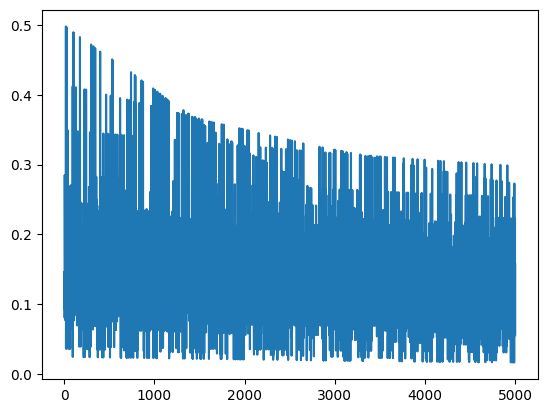

WEIGHT VECTOR [0.03564119 0.06299541 0.03819804 0.03292305 0.06813474 0.01855167
 0.02959278 0.45145317]
MEAN ABSOLUTE ERROR 0.3071735271199891
MEAN SQUARE ERROR 0.11913236632270408
R SQUARED -1.3501647980340157
CORRELATION COEFFICIENT 0.7527879039440198


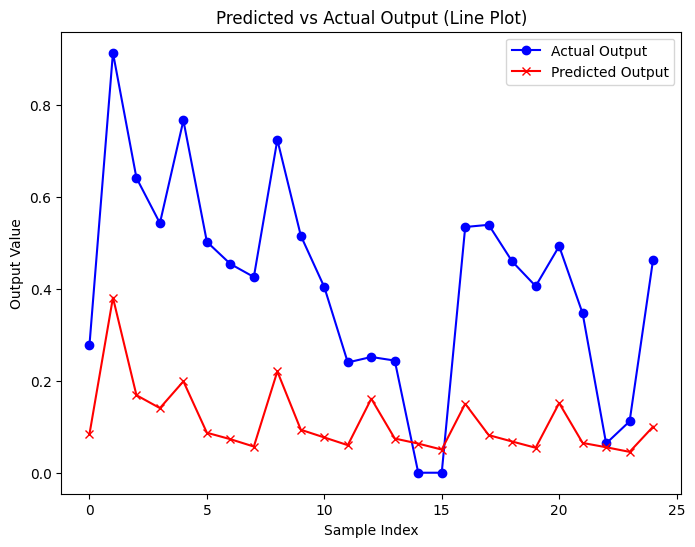

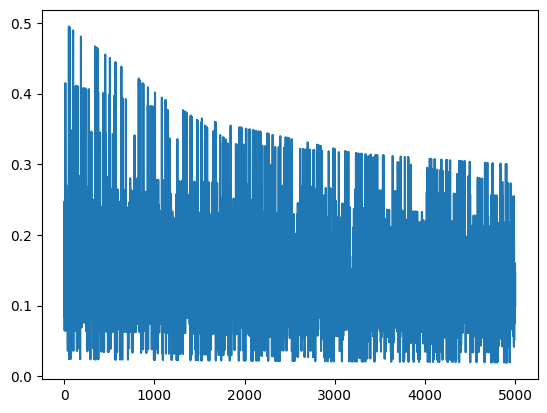

WEIGHT VECTOR [0.05546064 0.08199576 0.05746348 0.05262019 0.08838742 0.03853497
 0.04987358 0.46220966]
MEAN ABSOLUTE ERROR 0.3028893513717291
MEAN SQUARE ERROR 0.11588873096546404
R SQUARED -1.2861764977127184
CORRELATION COEFFICIENT 0.7515577738767348


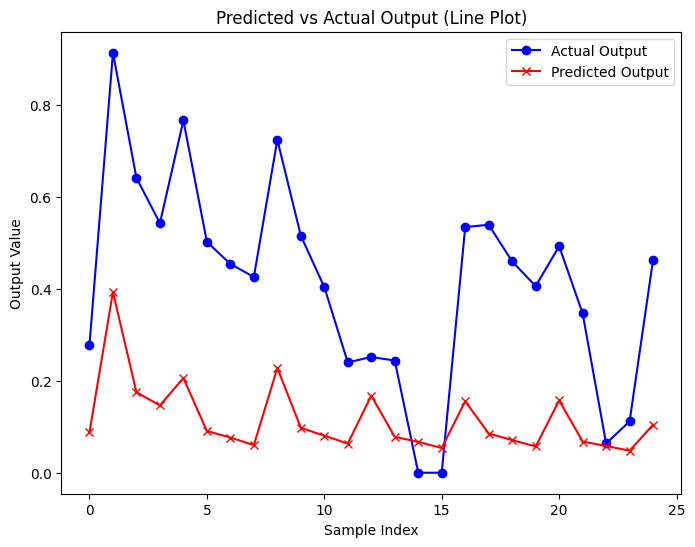

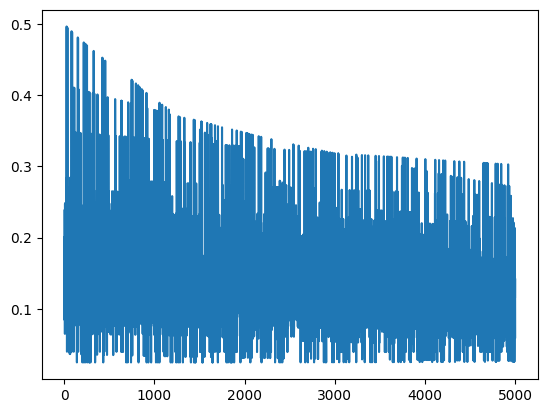

WEIGHT VECTOR [0.08081636 0.10627923 0.08212275 0.0773097  0.11190725 0.06341769
 0.0744373  0.4804235 ]
MEAN ABSOLUTE ERROR 0.2965998731657812
MEAN SQUARE ERROR 0.1111185532472668
R SQUARED -1.192073575897953
CORRELATION COEFFICIENT 0.7502699263532423


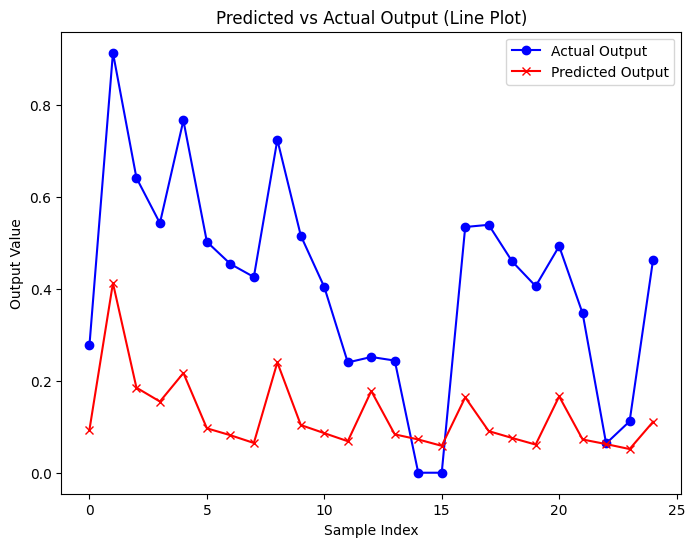

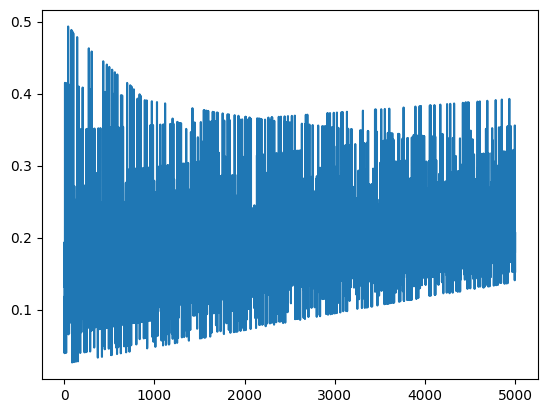

WEIGHT VECTOR [0.27913958 0.30178178 0.279348   0.27583034 0.30880631 0.26279047
 0.27320032 0.64103359]
MEAN ABSOLUTE ERROR 0.24647024077828777
MEAN SQUARE ERROR 0.0756146539098133
R SQUARED -0.49167605177083806
CORRELATION COEFFICIENT 0.7426760157017622


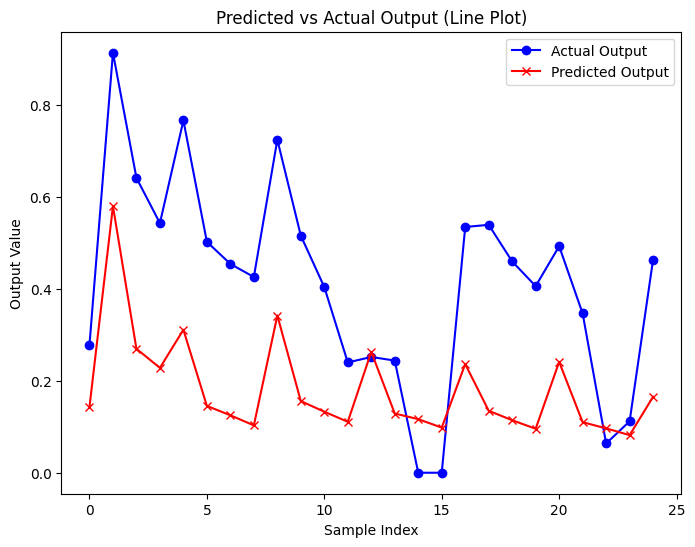

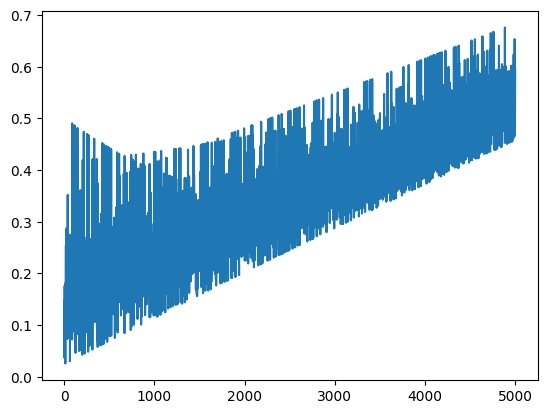

WEIGHT VECTOR [0.52720333 0.54799338 0.52723712 0.52374613 0.55390806 0.51194122
 0.52133344 0.85528842]
MEAN ABSOLUTE ERROR 0.18902560299105522
MEAN SQUARE ERROR 0.04367834508362566
R SQUARED 0.13834239828781092
CORRELATION COEFFICIENT 0.7376963376717677


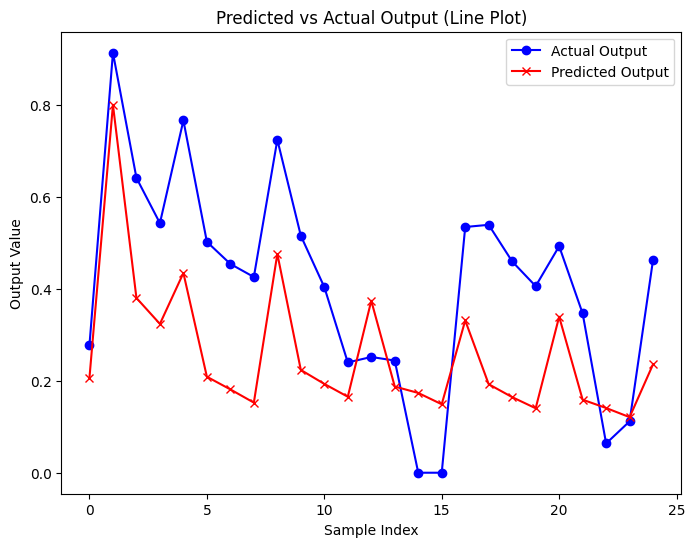

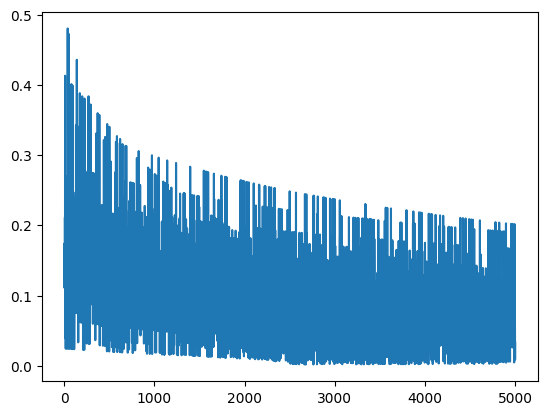

WEIGHT VECTOR [0.15101147 0.22989575 0.1391831  0.12577325 0.26486428 0.08004507
 0.12181689 1.40923035]
MEAN ABSOLUTE ERROR 0.14171419540733263
MEAN SQUARE ERROR 0.029487763827057697
R SQUARED 0.41828483175285924
CORRELATION COEFFICIENT 0.7519195770914758


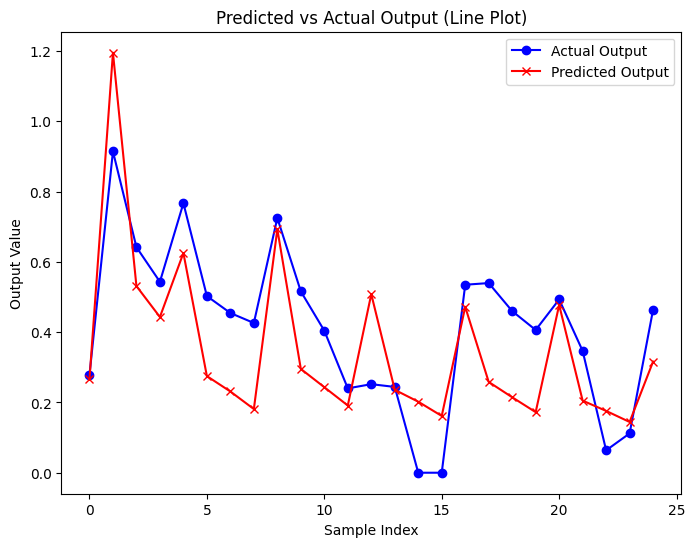

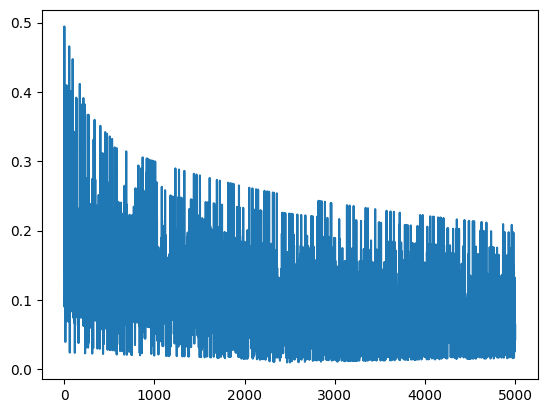

WEIGHT VECTOR [0.24598553 0.32013646 0.23305495 0.22225539 0.36056824 0.17842701
 0.21870546 1.43230871]
MEAN ABSOLUTE ERROR 0.13985334984304207
MEAN SQUARE ERROR 0.0292229191664933
R SQUARED 0.42350951264704795
CORRELATION COEFFICIENT 0.7499628417339989


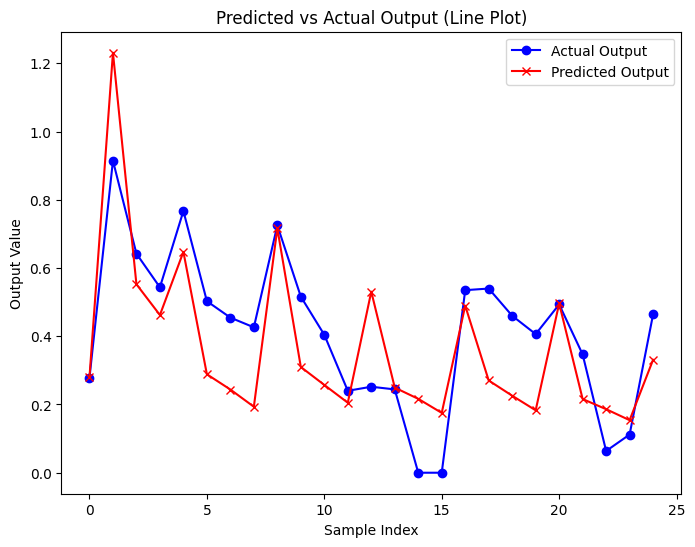

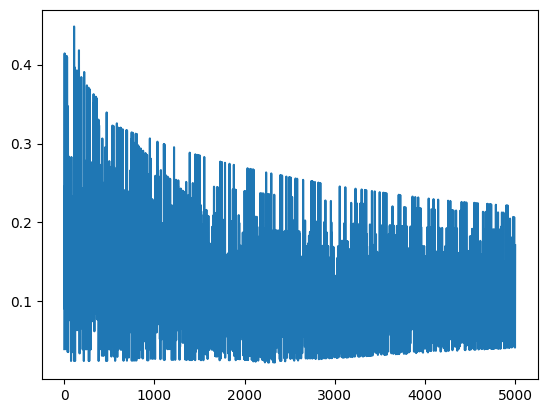

WEIGHT VECTOR [0.37152465 0.4402592  0.35561576 0.3420823  0.47506607 0.30230681
 0.34107691 1.49810078]
MEAN ABSOLUTE ERROR 0.1379516907331976
MEAN SQUARE ERROR 0.03072015820040781
R SQUARED 0.39397296787451497
CORRELATION COEFFICIENT 0.7479848473735321


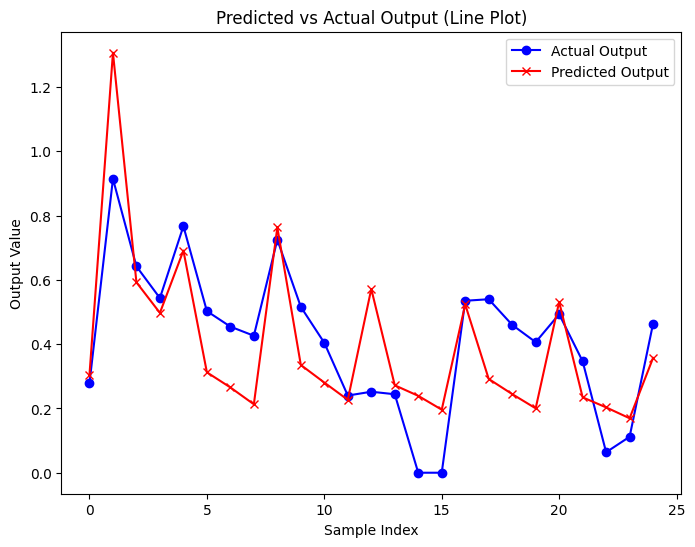

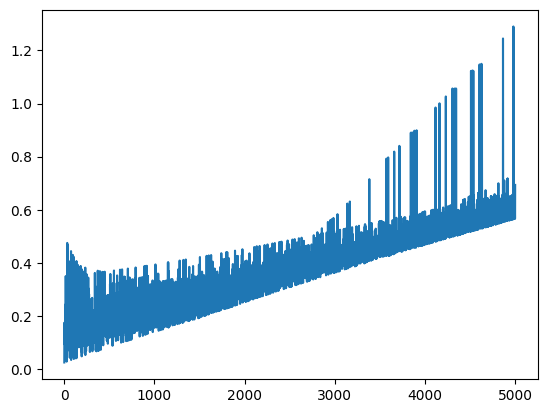

WEIGHT VECTOR [1.34718576 1.37769144 1.31862472 1.30953938 1.41152687 1.29065331
 1.31729191 1.93632869]
MEAN ABSOLUTE ERROR 0.2347417166346052
MEAN SQUARE ERROR 0.10453864885269341
R SQUARED -1.0622695590729418
CORRELATION COEFFICIENT 0.7355936668103069


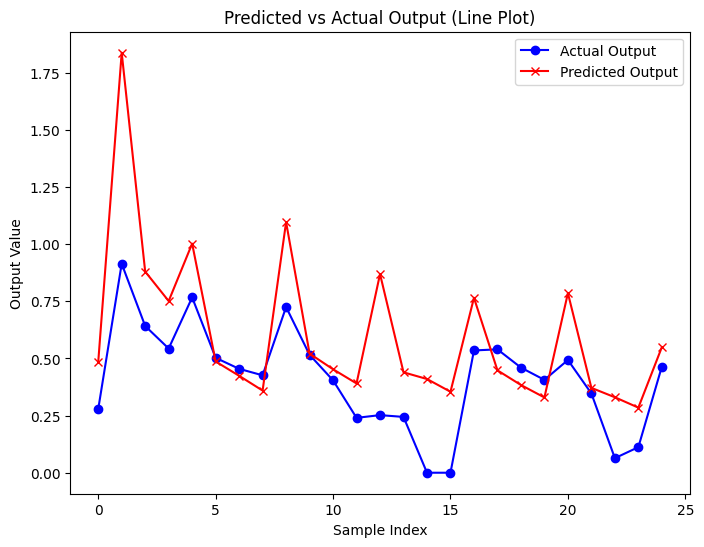

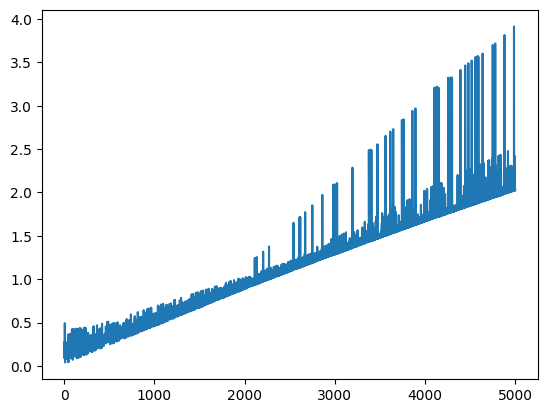

WEIGHT VECTOR [2.56675571 2.54900043 2.52187521 2.51873323 2.57760268 2.52567697
 2.53708206 2.45021851]
MEAN ABSOLUTE ERROR 0.47704996390267157
MEAN SQUARE ERROR 0.3423687145827464
R SQUARED -5.754024332740731
CORRELATION COEFFICIENT 0.7261990596540172


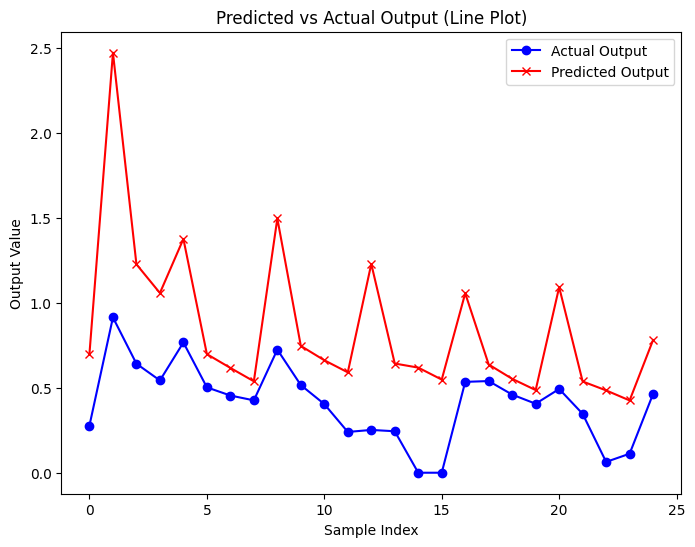

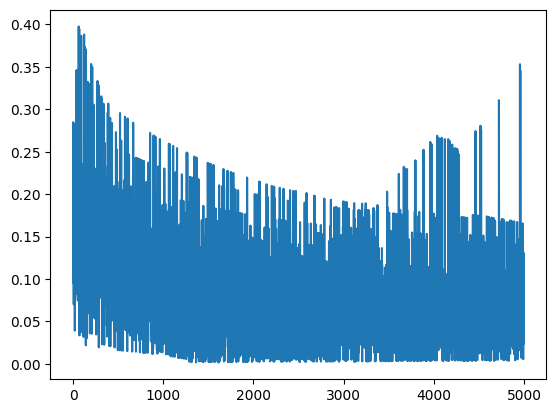

WEIGHT VECTOR [0.26727402 0.35546107 0.21374647 0.20289869 0.45477731 0.14433372
 0.20981281 1.77931101]
MEAN ABSOLUTE ERROR 0.15841997244961897
MEAN SQUARE ERROR 0.04365006279881155
R SQUARED 0.13890033256066892
CORRELATION COEFFICIENT 0.7503496417471018


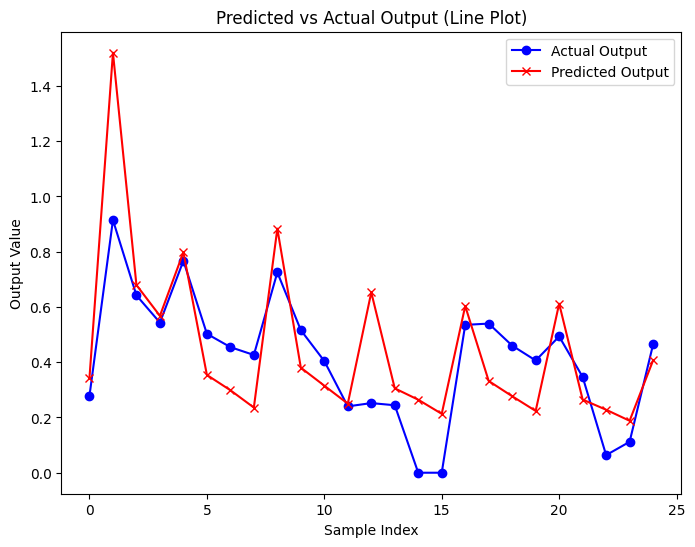

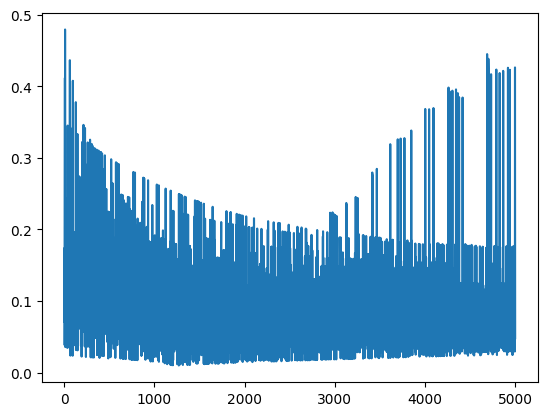

WEIGHT VECTOR [0.45974999 0.53445536 0.40224163 0.39116909 0.61177082 0.33910243
 0.40008279 1.80315186]
MEAN ABSOLUTE ERROR 0.16762256727258784
MEAN SQUARE ERROR 0.0498385115782506
R SQUARED 0.016818694087393005
CORRELATION COEFFICIENT 0.7477174818183062


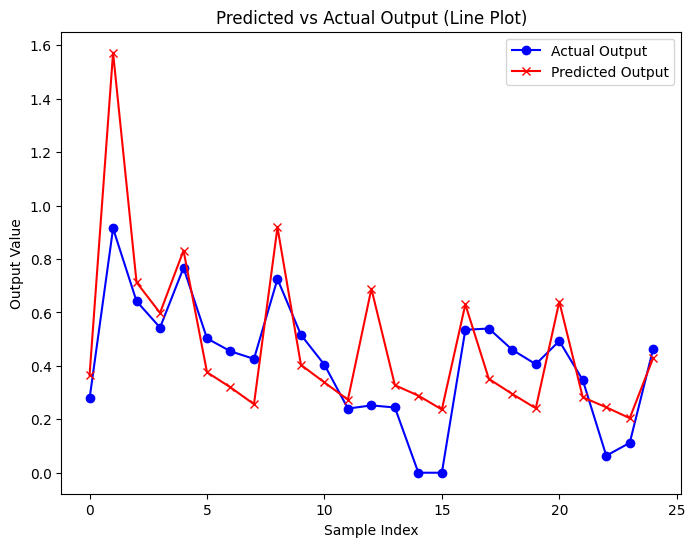

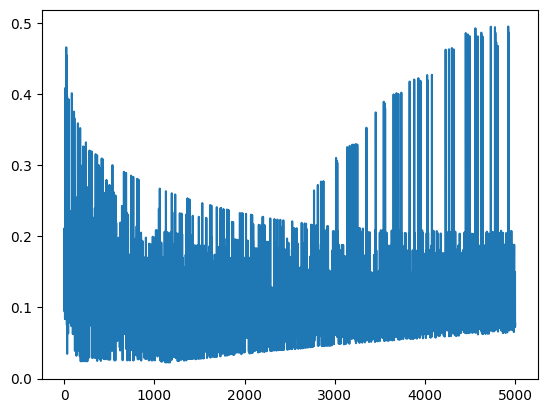

WEIGHT VECTOR [0.70019595 0.75183646 0.63269422 0.62797982 0.82759724 0.58497787
 0.64072164 1.79897553]
MEAN ABSOLUTE ERROR 0.17617598124665423
MEAN SQUARE ERROR 0.05625213874640182
R SQUARED -0.10970511521455473
CORRELATION COEFFICIENT 0.744015477254982


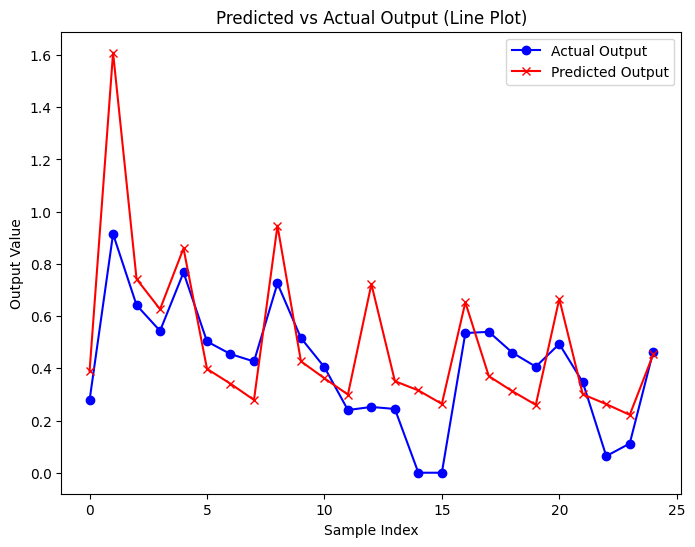

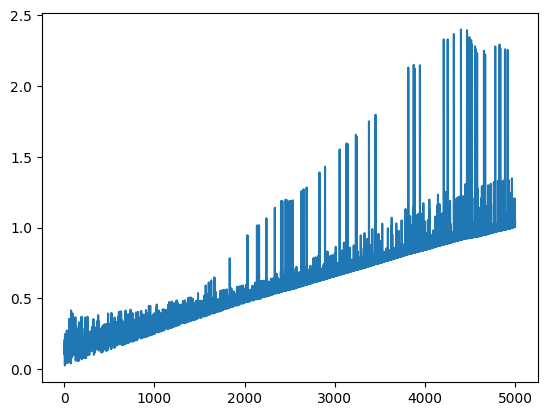

WEIGHT VECTOR [2.62144841 2.56679044 2.52589189 2.52395226 2.62143078 2.54690096
 2.56426561 2.1127998 ]
MEAN ABSOLUTE ERROR 0.3974227826216318
MEAN SQUARE ERROR 0.24293780793553363
R SQUARED -3.7925169451857874
CORRELATION COEFFICIENT 0.7213249893965497


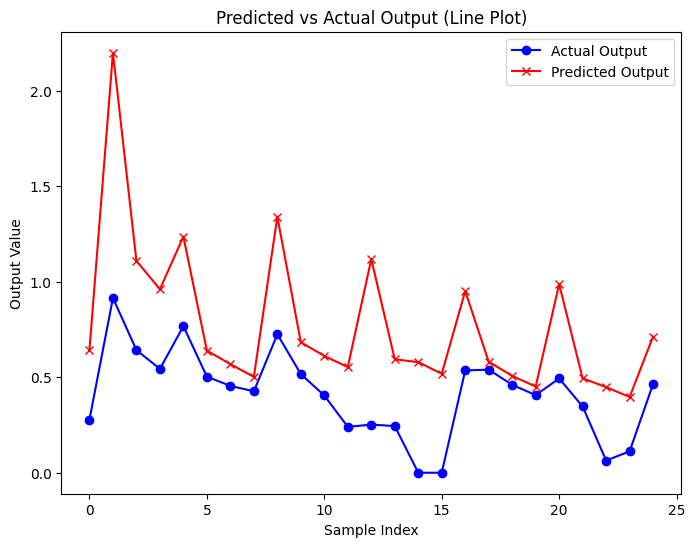

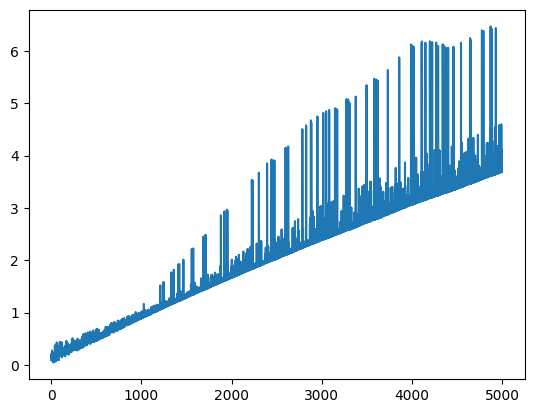

WEIGHT VECTOR [5.02574046 4.8236768  4.88100838 4.89572846 4.86092826 5.00022984
 4.97197926 2.43356604]
MEAN ABSOLUTE ERROR 0.74289298075264
MEAN SQUARE ERROR 0.7037096009317935
R SQUARED -12.882319164790072
CORRELATION COEFFICIENT 0.7010616949824455


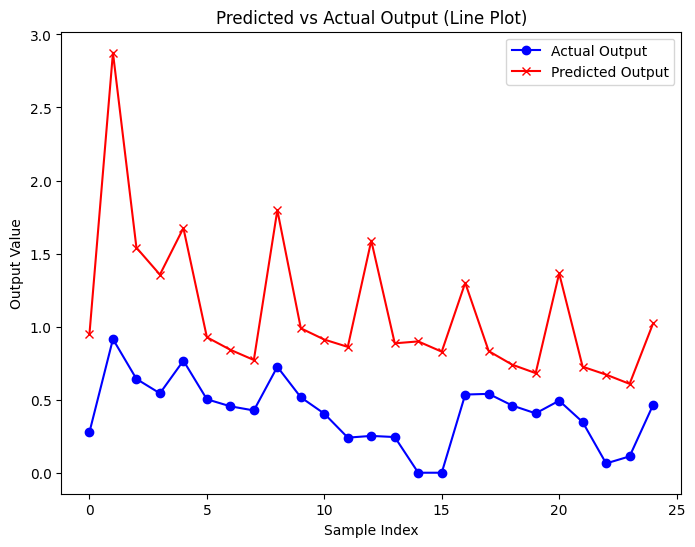

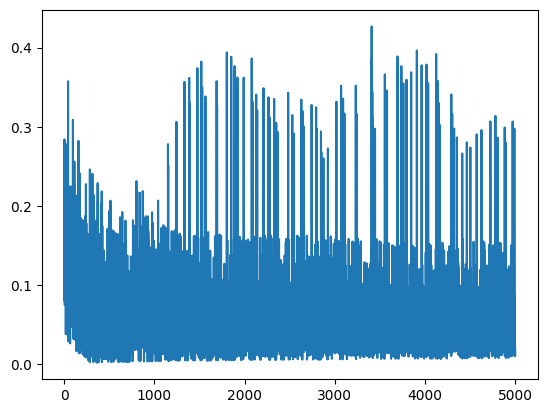

WEIGHT VECTOR [1.06465121 1.00028373 0.60081105 0.6554077  1.48798899 0.59491032
 0.78874166 1.59864182]
MEAN ABSOLUTE ERROR 0.1617566266746142
MEAN SQUARE ERROR 0.04518947817402688
R SQUARED 0.10853176072702175
CORRELATION COEFFICIENT 0.7346090411569596


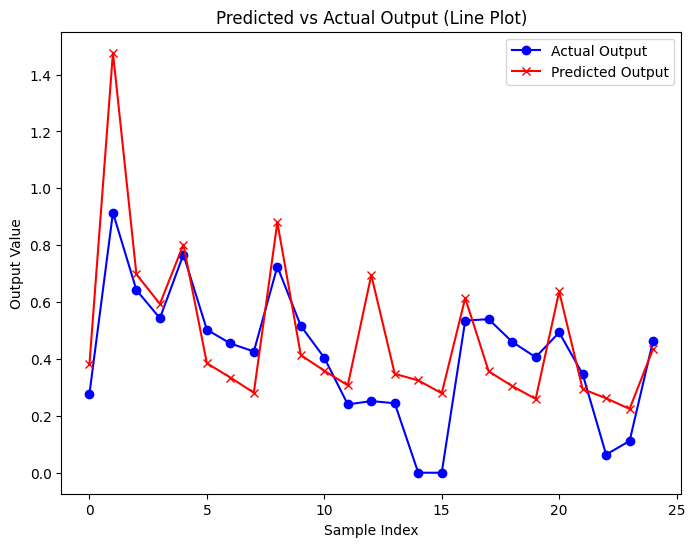

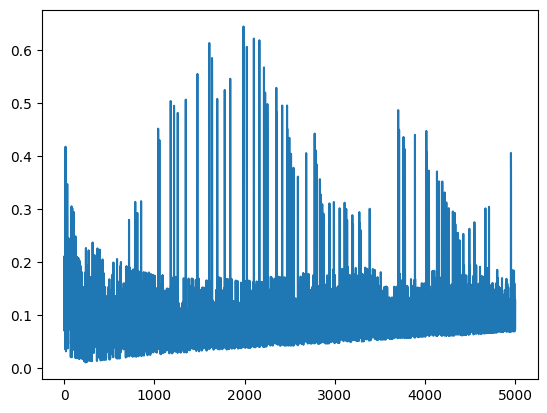

WEIGHT VECTOR [1.96284092 1.82938666 1.51537732 1.51645624 2.18930322 1.54107793
 1.68724436 1.46926407]
MEAN ABSOLUTE ERROR 0.1864413810446566
MEAN SQUARE ERROR 0.06185788774500747
R SQUARED -0.2202916364916585
CORRELATION COEFFICIENT 0.719061043866421


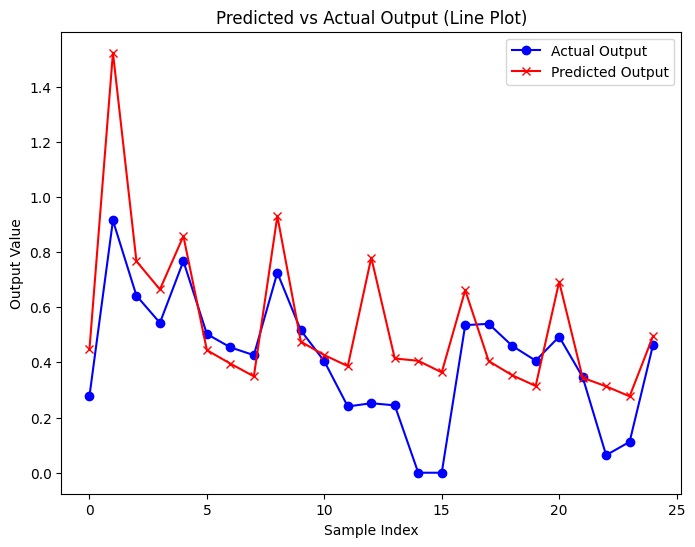

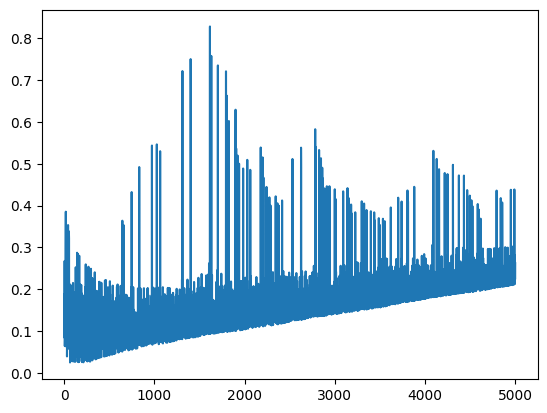

WEIGHT VECTOR [3.11686929 2.88700069 2.65853483 2.63196174 3.11378409 2.73649235
 2.83181443 1.1298755 ]
MEAN ABSOLUTE ERROR 0.20406449474094634
MEAN SQUARE ERROR 0.072549798461048
R SQUARED -0.431214603643133
CORRELATION COEFFICIENT 0.688087908738147


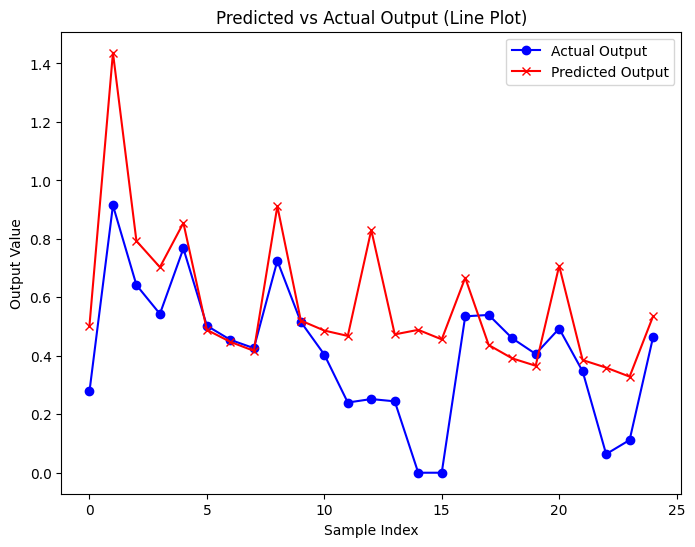

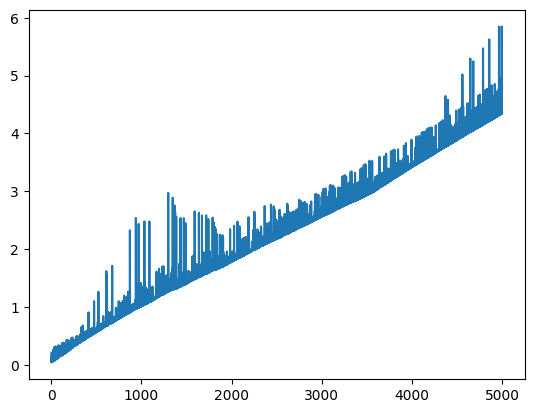

WEIGHT VECTOR [12.44047324 11.7566225  12.04772082 11.81510735 11.02445223 12.37971474
 12.16748914 -3.08496389]
MEAN ABSOLUTE ERROR 0.4310200781462883
MEAN SQUARE ERROR 0.30550843766315483
R SQUARED -5.026869085714462
CORRELATION COEFFICIENT -0.8154676547088666


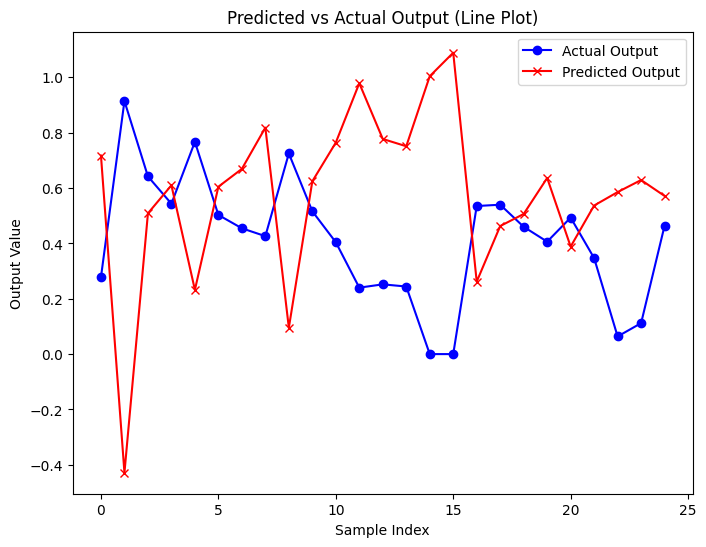

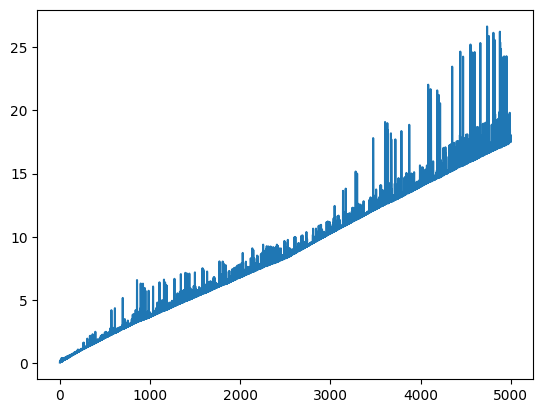

WEIGHT VECTOR [24.36332876 23.79282235 24.37754105 23.74752504 21.73028832 24.55988445
 24.1243637  -7.63889163]
MEAN ABSOLUTE ERROR 0.9136114309424167
MEAN SQUARE ERROR 1.2789851459282169
R SQUARED -24.230975929973177
CORRELATION COEFFICIENT -0.8230070115671654


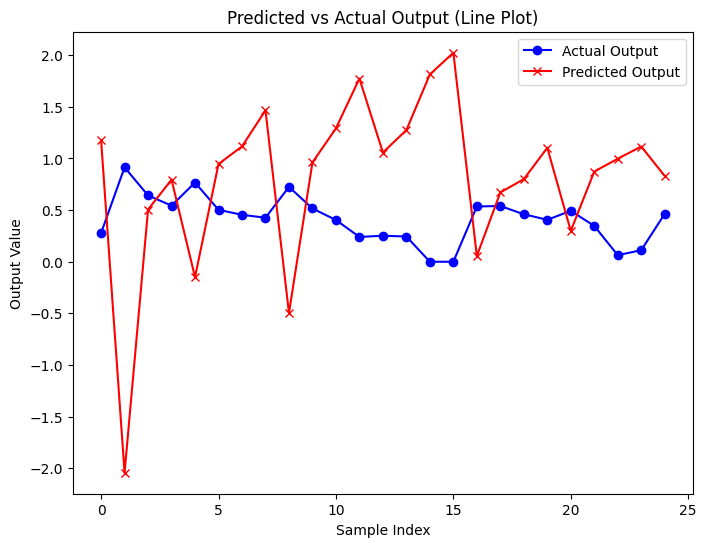

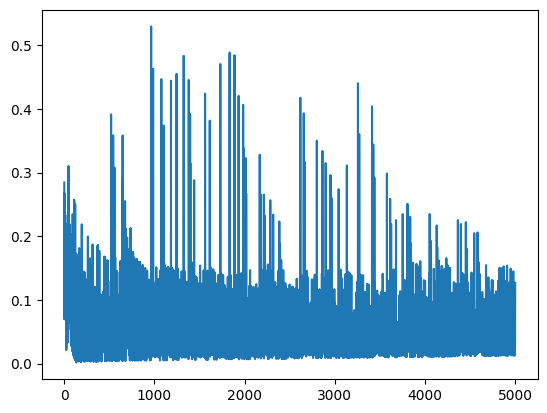

WEIGHT VECTOR [1.97155242 1.72497666 1.06070916 1.08350577 2.44841927 1.09576738
 1.39159612 1.20554259]
MEAN ABSOLUTE ERROR 0.1431732245655649
MEAN SQUARE ERROR 0.03500267557346813
R SQUARED 0.3094902879126936
CORRELATION COEFFICIENT 0.7117572780331392


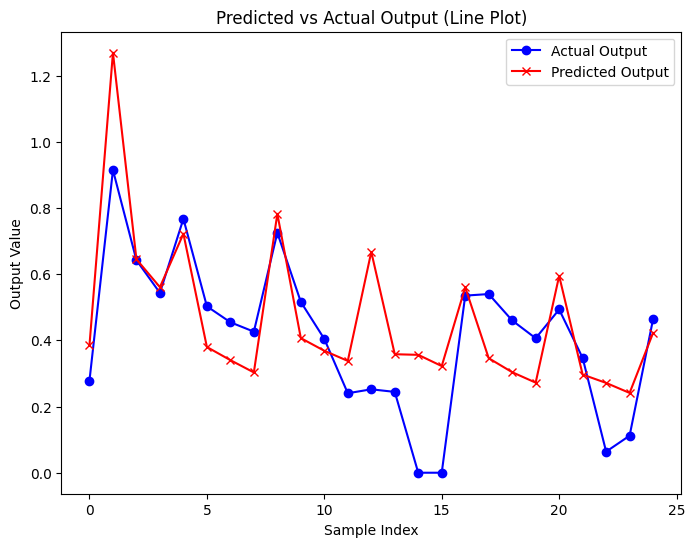

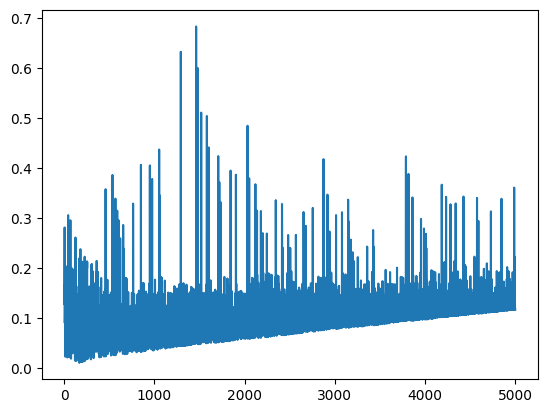

WEIGHT VECTOR [3.68170726 3.29740538 2.85096075 2.79586253 3.66247163 2.95131386
 3.13809976 1.05742328]
MEAN ABSOLUTE ERROR 0.22220282147199266
MEAN SQUARE ERROR 0.08234923758459299
R SQUARED -0.6245314794806243
CORRELATION COEFFICIENT 0.6770719321699236


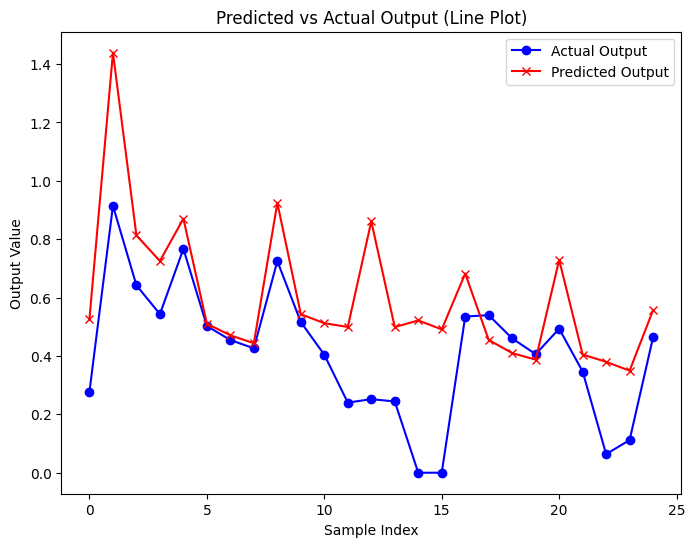

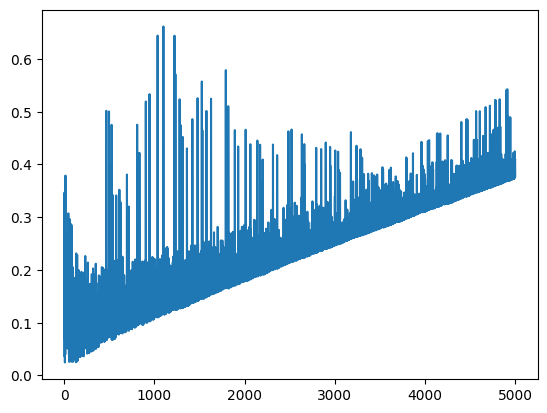

WEIGHT VECTOR [5.93052202 5.32442191 5.08268353 4.89721228 5.26959401 5.30422977
 5.36137996 0.24739327]
MEAN ABSOLUTE ERROR 0.2518846404920506
MEAN SQUARE ERROR 0.1009483572897734
R SQUARED -0.9914426536205896
CORRELATION COEFFICIENT 0.5321478523868989


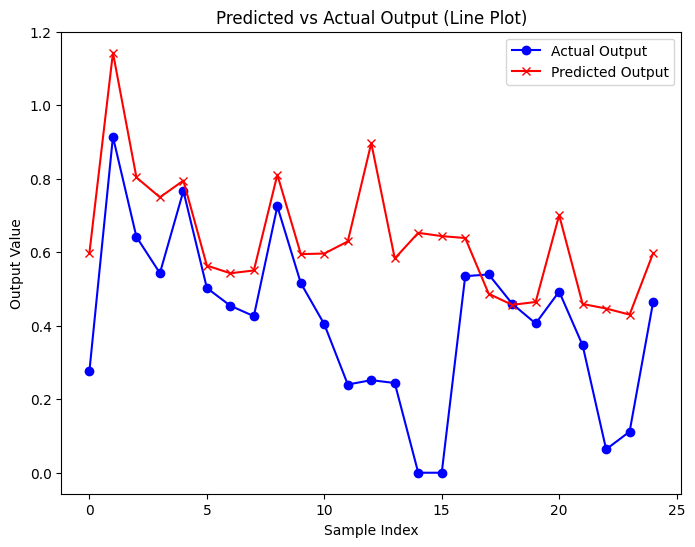

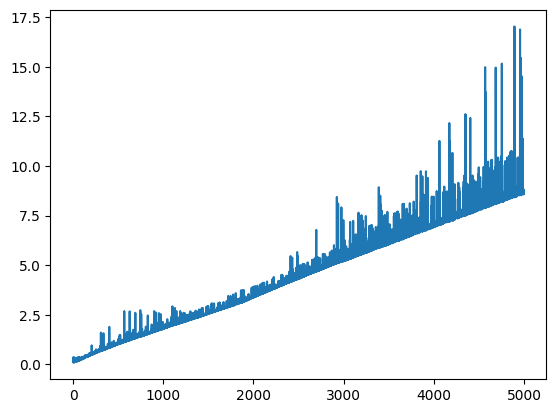

WEIGHT VECTOR [24.21545247 24.02067413 24.62570675 23.16002181 19.88265441 24.36217407
 23.76644461 -7.36250575]
MEAN ABSOLUTE ERROR 0.8768996440235753
MEAN SQUARE ERROR 1.1588942519305612
R SQUARED -21.86190192977062
CORRELATION COEFFICIENT -0.8169771223032302


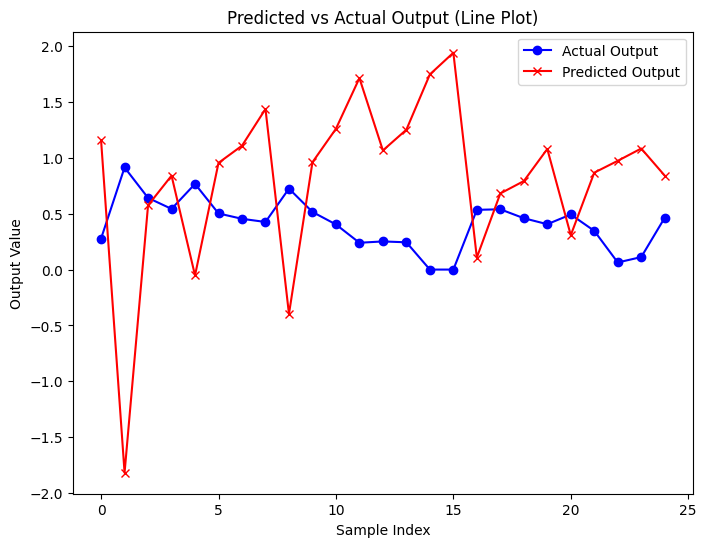

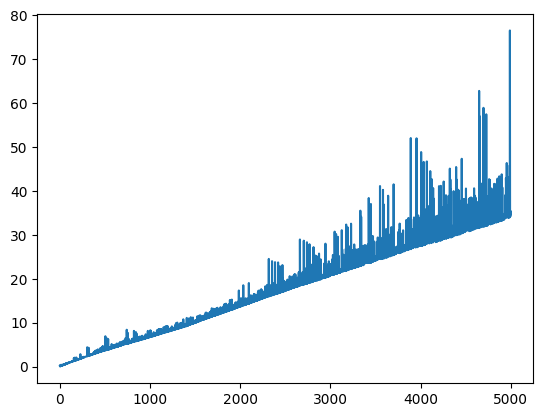

WEIGHT VECTOR [ 47.003289    47.3507808   49.06368723  45.84298876  37.49164122
  48.10617044  46.58201469 -17.84466339]
MEAN ABSOLUTE ERROR 1.7356185902746049
MEAN SQUARE ERROR 5.2544651998609
R SQUARED -102.65662604029404
CORRELATION COEFFICIENT -0.8130197200359409


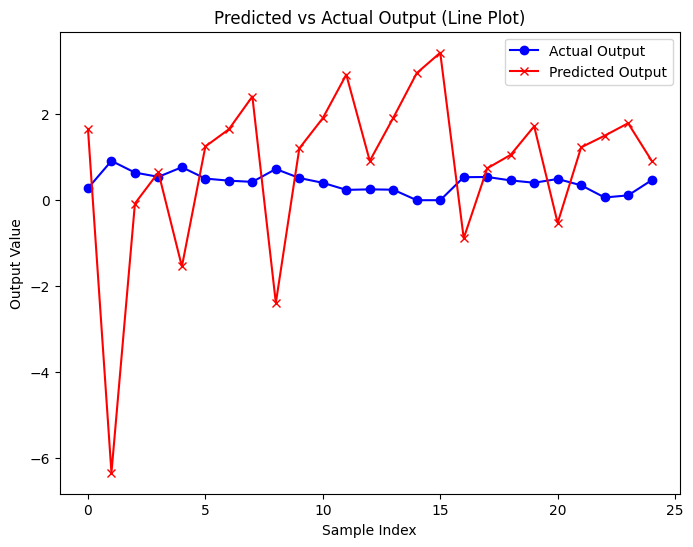

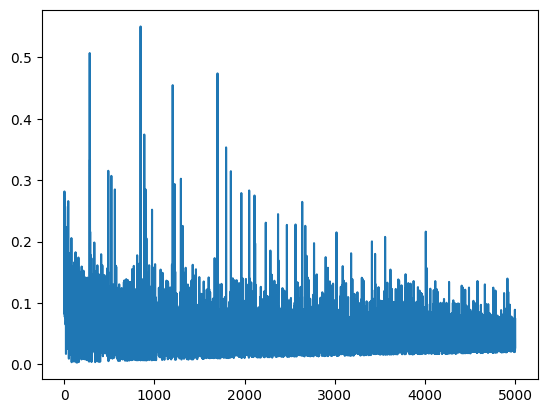

WEIGHT VECTOR [3.64719178 3.04231695 1.94676816 1.72186878 3.68161902 2.00794715
 2.44699195 1.06394492]
MEAN ABSOLUTE ERROR 0.17998274159738048
MEAN SQUARE ERROR 0.058278807242174185
R SQUARED -0.1496858954430511
CORRELATION COEFFICIENT 0.6909810350941524


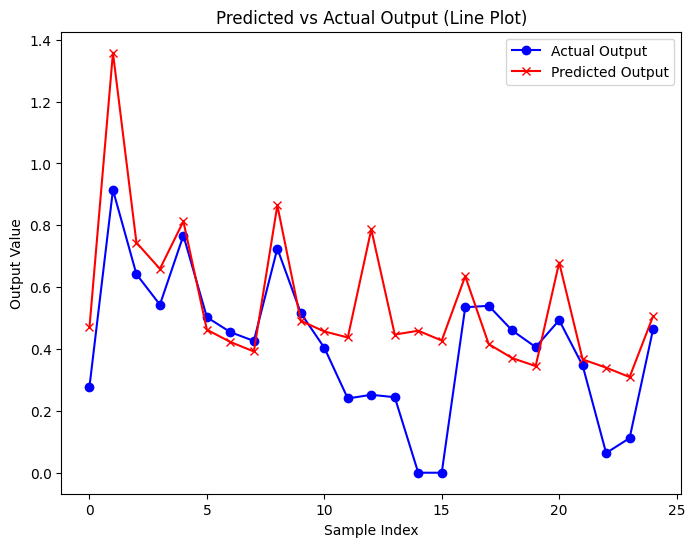

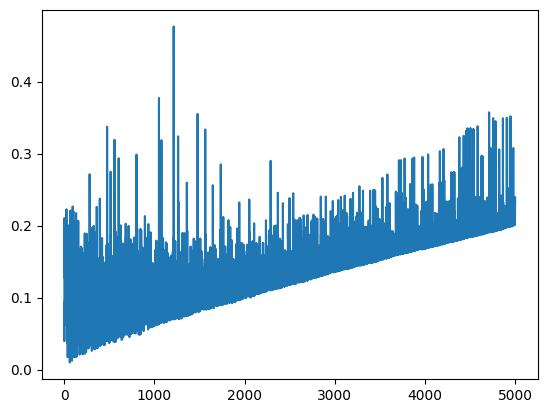

WEIGHT VECTOR [ 6.86655349  5.97702436  5.40074782  4.90177718  5.34440221  5.60815409
  5.73756541 -0.23682632]
MEAN ABSOLUTE ERROR 0.19263884375334642
MEAN SQUARE ERROR 0.07317505905206953
R SQUARED -0.4435493324492097
CORRELATION COEFFICIENT 0.3632589246035347


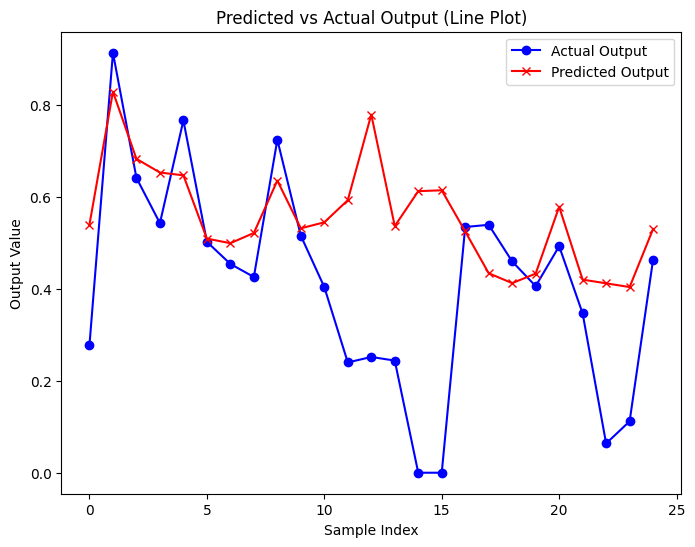

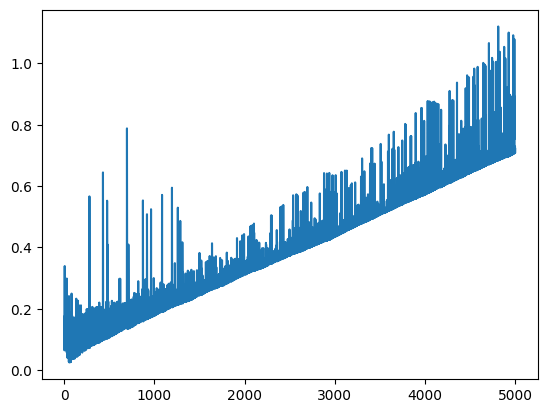

WEIGHT VECTOR [11.07830236 10.33402975 10.14997856  8.98467687  8.00668128 10.16762624
  9.97790542 -2.06294262]
MEAN ABSOLUTE ERROR 0.32275553141505314
MEAN SQUARE ERROR 0.17159826002740153
R SQUARED -2.385177366727327
CORRELATION COEFFICIENT -0.7342928457978599


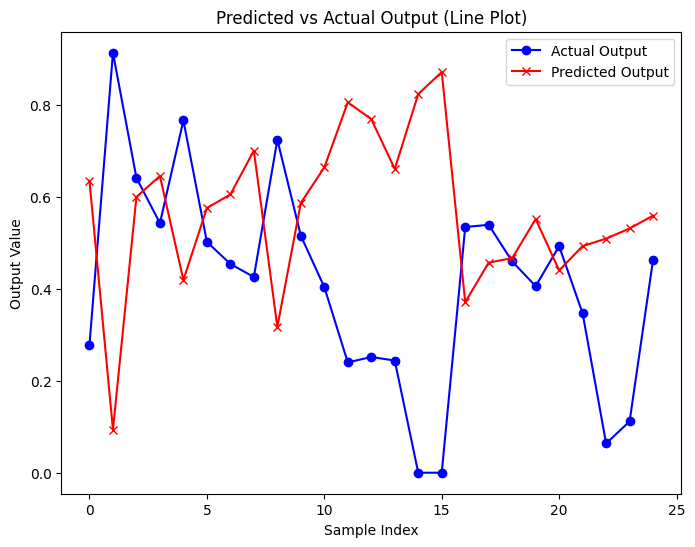

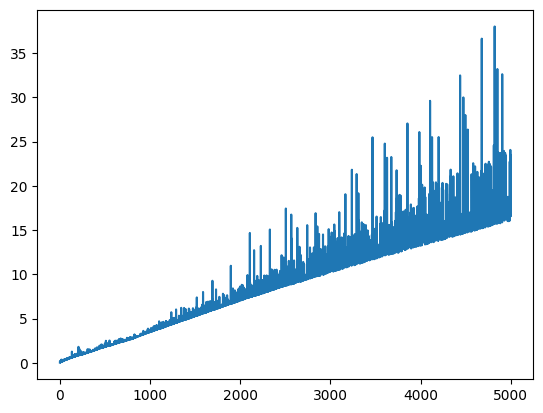

WEIGHT VECTOR [ 45.03892528  46.37102201  48.76430675  43.7588936   30.33033336
  46.87923651  44.56400741 -15.41910718]
MEAN ABSOLUTE ERROR 1.5997872986592268
MEAN SQUARE ERROR 3.8695562173644595
R SQUARED -75.33605448102709
CORRELATION COEFFICIENT -0.8056581526830339


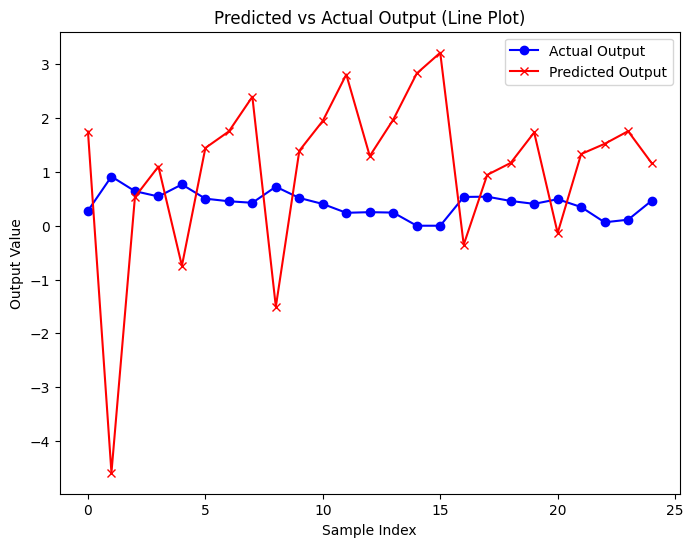

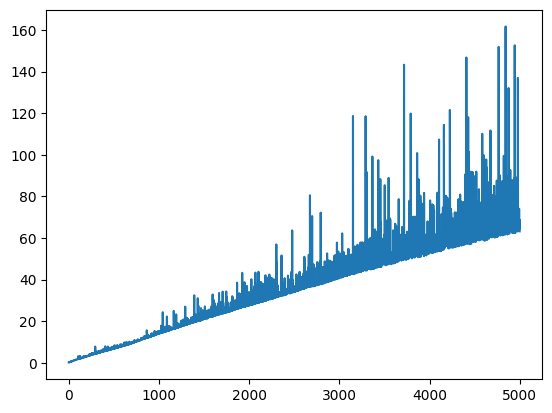

WEIGHT VECTOR [ 87.0201838   90.91982252  97.10914392  86.26973462  57.77445676
  92.54229875  87.46318817 -30.22543772]
MEAN ABSOLUTE ERROR 3.242310164318391
MEAN SQUARE ERROR 14.699376187618284
R SQUARED -288.97960449826326
CORRELATION COEFFICIENT -0.8043249383963047


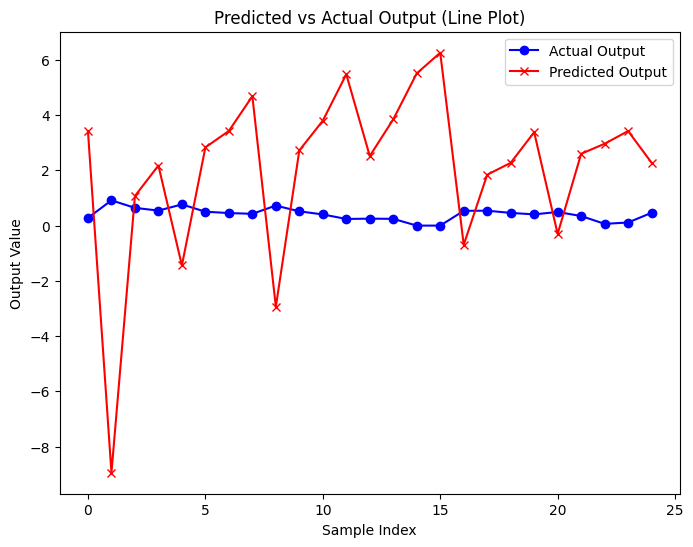

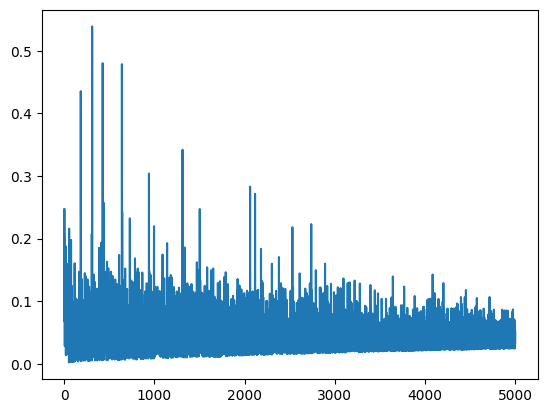

WEIGHT VECTOR [4.94768225 4.04127369 2.70493054 2.10196777 4.05989969 2.76467271
 3.24023797 0.62263371]
MEAN ABSOLUTE ERROR 0.1539806006047724
MEAN SQUARE ERROR 0.04662602304284742
R SQUARED 0.08019255043757578
CORRELATION COEFFICIENT 0.6644684396581306


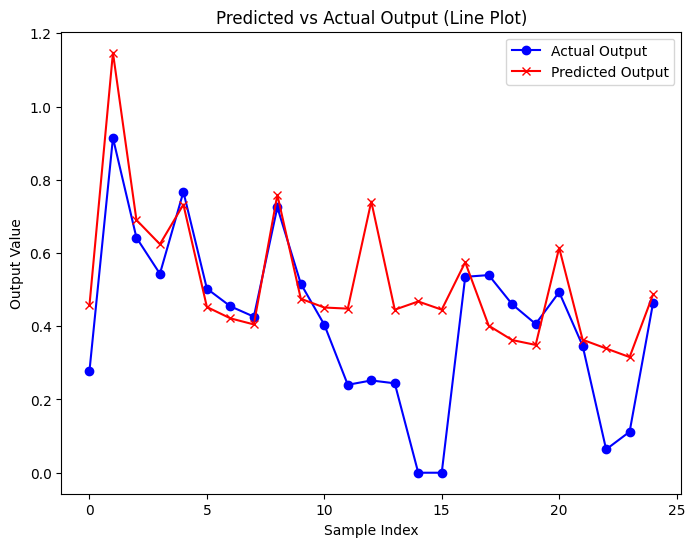

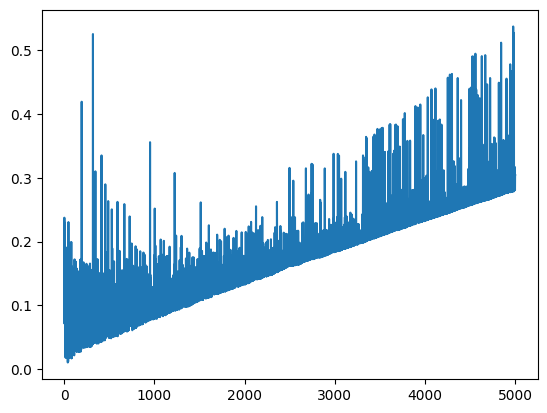

WEIGHT VECTOR [ 9.51426237  8.55785457  8.02621703  6.74938948  6.09670309  8.01945936
  7.96200293 -0.97968508]
MEAN ABSOLUTE ERROR 0.2557816849842847
MEAN SQUARE ERROR 0.1105404730557554
R SQUARED -1.1806695909149743
CORRELATION COEFFICIENT -0.08210169208399053


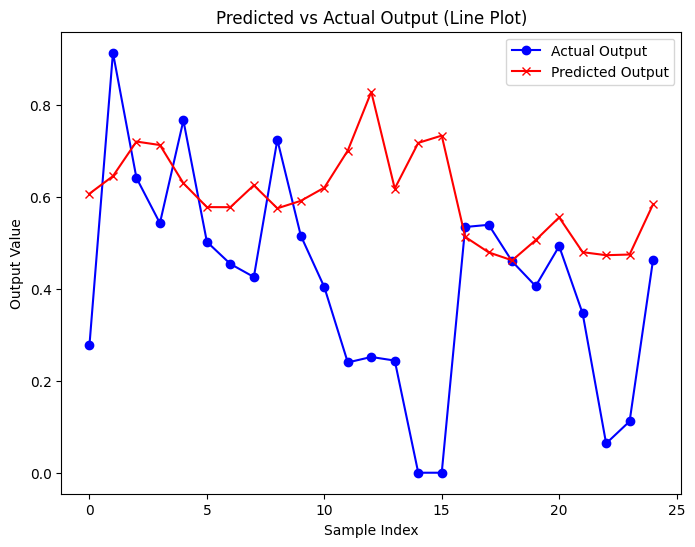

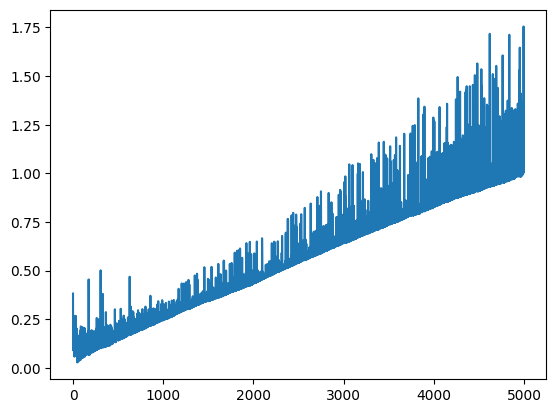

WEIGHT VECTOR [15.39706417 14.89389175 15.07988522 12.73894729  8.87769063 14.63214056
 13.94740746 -2.78276075]
MEAN ABSOLUTE ERROR 0.48488364304288256
MEAN SQUARE ERROR 0.32637221150557477
R SQUARED -5.438455863952188
CORRELATION COEFFICIENT -0.6620035843097739


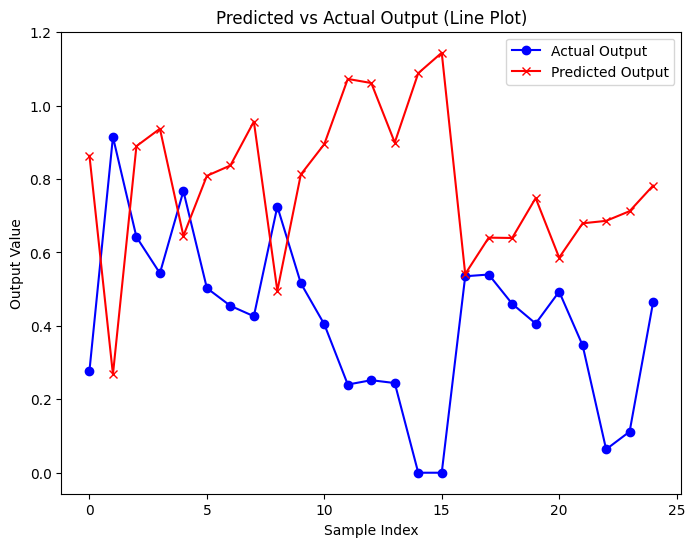

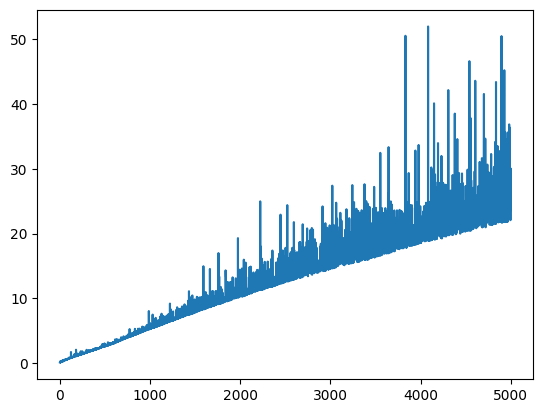

WEIGHT VECTOR [ 62.36183483  65.87746668  72.20015078  59.90041445  29.83843685
  67.4245928   61.75381452 -16.23025326]
MEAN ABSOLUTE ERROR 2.4411273846236
MEAN SQUARE ERROR 7.142232406808201
R SQUARED -139.8972531980963
CORRELATION COEFFICIENT -0.7602808282663671


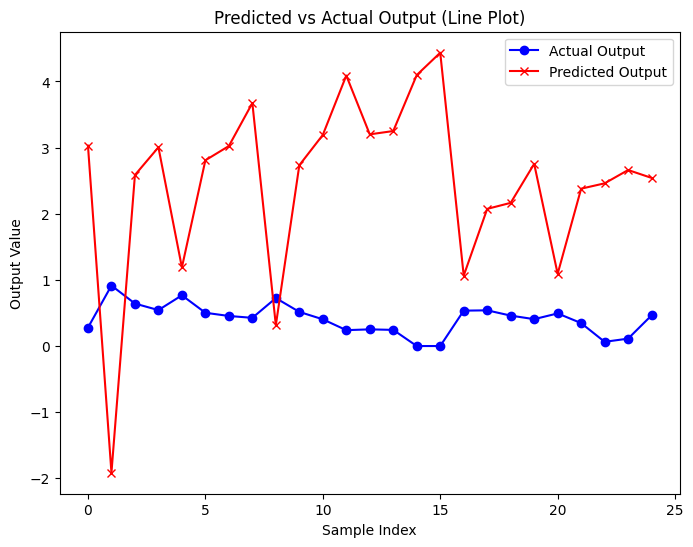

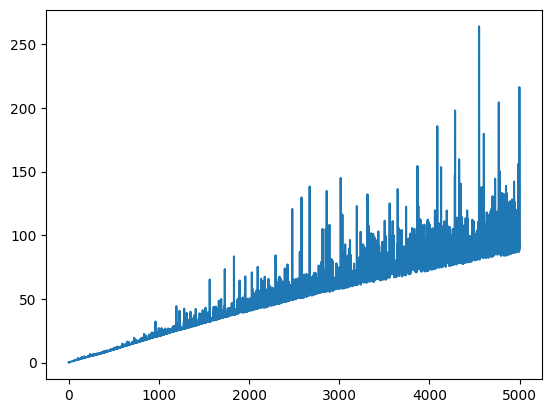

WEIGHT VECTOR [121.21372083 128.52183948 142.34804495 118.71749493  57.23121803
 133.73320897 122.50369858 -40.67189597]
MEAN ABSOLUTE ERROR 4.259744195677338
MEAN SQUARE ERROR 24.095901830565687
R SQUARED -474.3480687664855
CORRELATION COEFFICIENT -0.7872116698489218


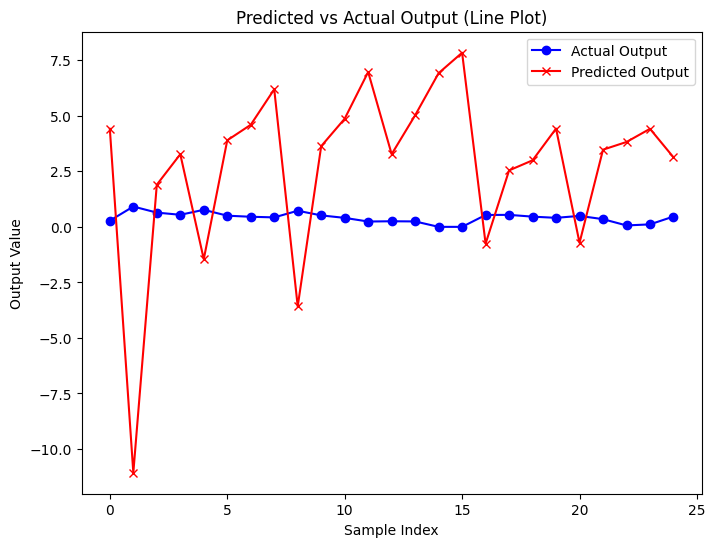

In [ ]:
for i in range(alpha.shape[0]-1):
  for j in range(lamb.shape[0]-1):
    a = alpha[i]
    l = lamb[j]
    iters = 5000
    sto_weight,sto_J_hist = stochastic_gradient_descent_l1(X_train,y_train,w,a, iters,l)
    plt.plot(range(iters),sto_J_hist)
    plt.show()
    cal(X_test,y_test,sto_weight)

# Mini_Batch Gradient Descent

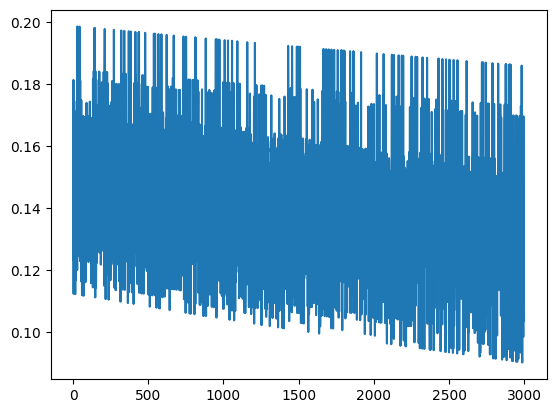

WEIGHT VECTOR [0.01821463 0.03207929 0.01804359 0.01626297 0.0396194  0.00853886
 0.01592764 0.23377106]
MEAN ABSOLUTE ERROR 0.3582740863854197
MEAN SQUARE ERROR 0.16362965708899146
R SQUARED -2.2279780203747754
CORRELATION COEFFICIENT 0.7523630535302402


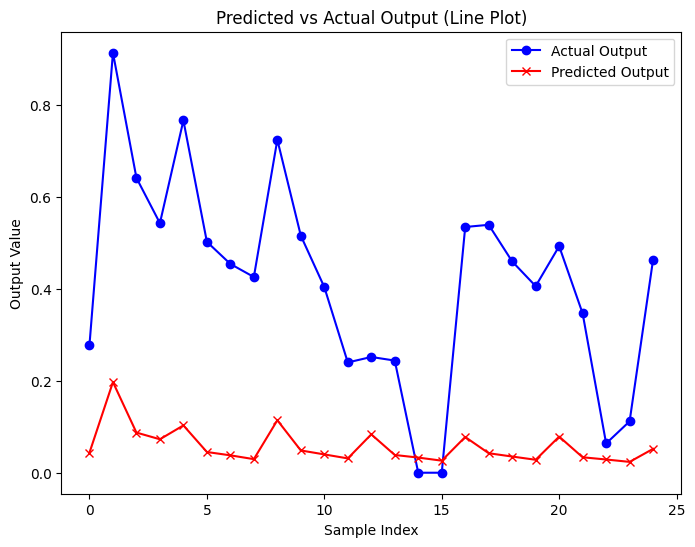

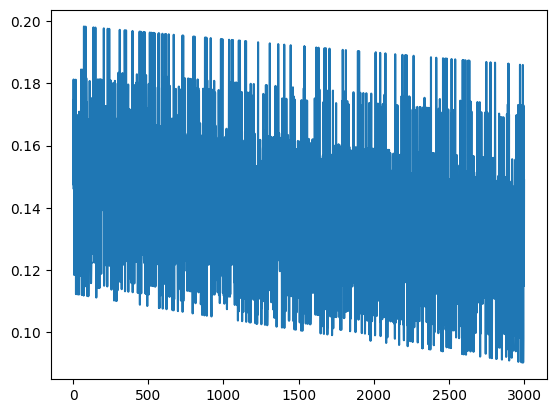

WEIGHT VECTOR [0.01817114 0.03214698 0.01809197 0.01633266 0.03996274 0.00858285
 0.01596864 0.23409571]
MEAN ABSOLUTE ERROR 0.3581903216632045
MEAN SQUARE ERROR 0.16355023691470522
R SQUARED -2.226411271525385
CORRELATION COEFFICIENT 0.7523306807885347


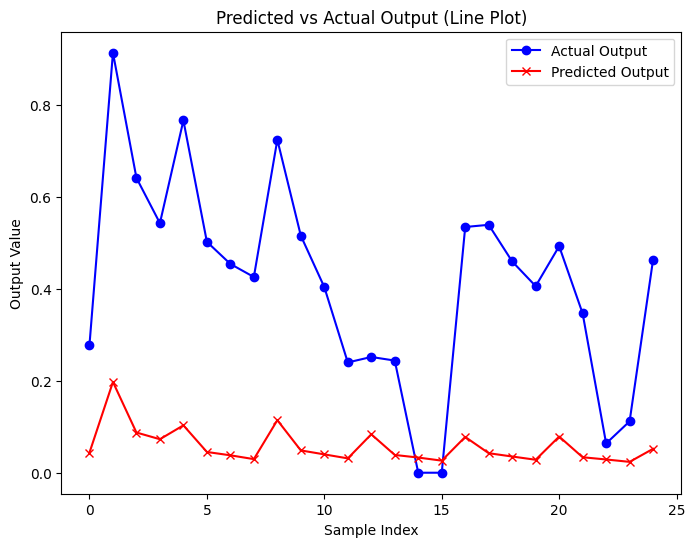

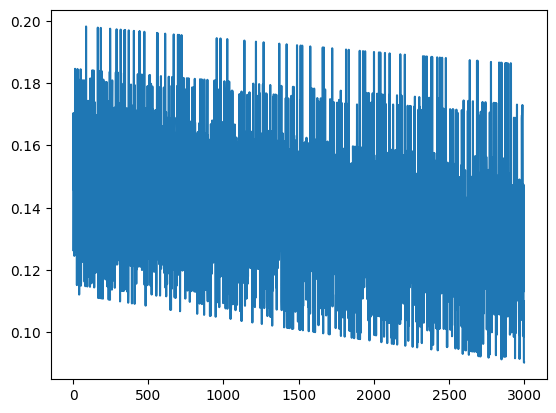

WEIGHT VECTOR [0.01831528 0.03236345 0.01827857 0.01639348 0.03976347 0.00867148
 0.01606056 0.23553199]
MEAN ABSOLUTE ERROR 0.35786019568576755
MEAN SQUARE ERROR 0.16323313021380867
R SQUARED -2.2201555995474687
CORRELATION COEFFICIENT 0.7523800096947595


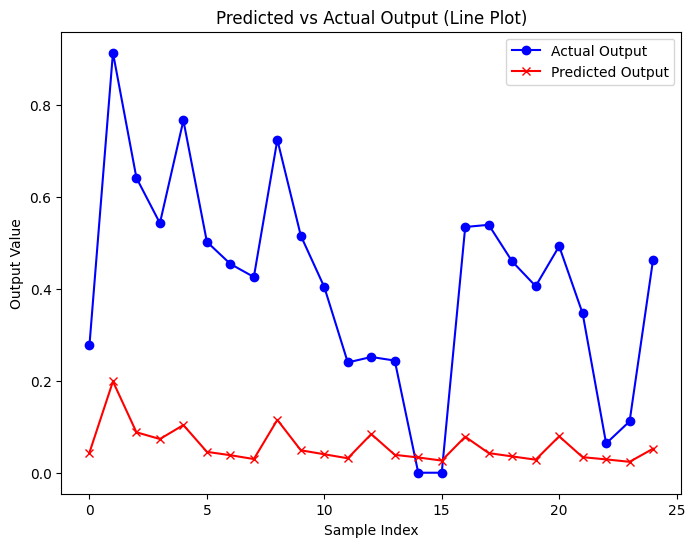

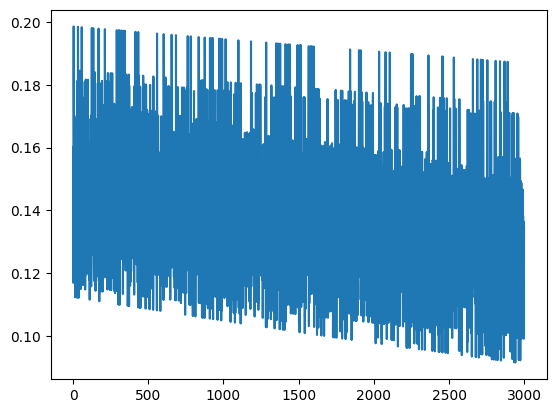

WEIGHT VECTOR [0.0187656  0.03285153 0.01881721 0.01705892 0.04057108 0.00924942
 0.01660193 0.23748682]
MEAN ABSOLUTE ERROR 0.35736416619386047
MEAN SQUARE ERROR 0.1627620738359725
R SQUARED -2.210862909817113
CORRELATION COEFFICIENT 0.752302841407491


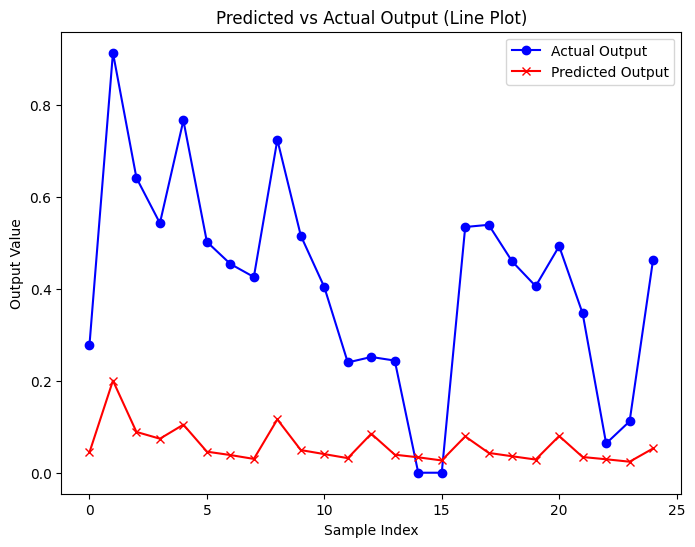

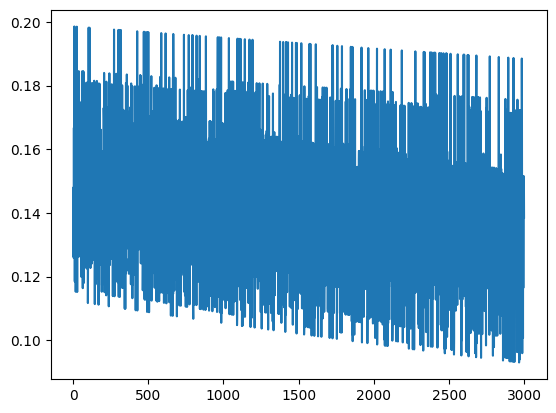

WEIGHT VECTOR [0.01982479 0.03351033 0.01952116 0.01767985 0.04078699 0.01005573
 0.01742195 0.23521686]
MEAN ABSOLUTE ERROR 0.3578161191496797
MEAN SQUARE ERROR 0.1631992024312034
R SQUARED -2.219486294615354
CORRELATION COEFFICIENT 0.7522357105937892


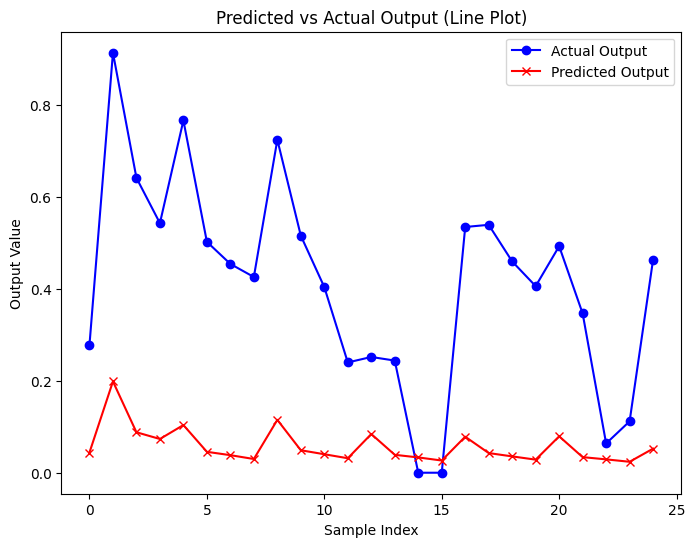

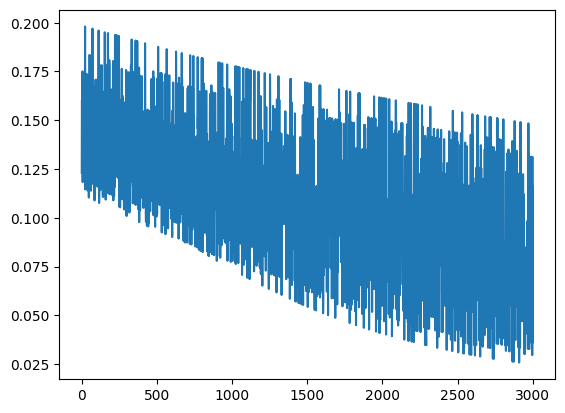

WEIGHT VECTOR [0.08036801 0.1372758  0.07703678 0.06999778 0.17334068 0.03773451
 0.06962313 0.97715438]
MEAN ABSOLUTE ERROR 0.19730212816877576
MEAN SQUARE ERROR 0.04839617273933956
R SQUARED 0.04527220399975318
CORRELATION COEFFICIENT 0.7521825353340131


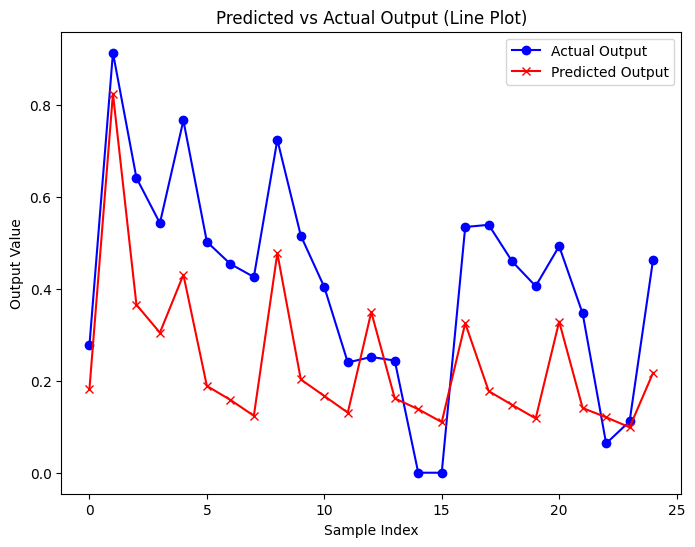

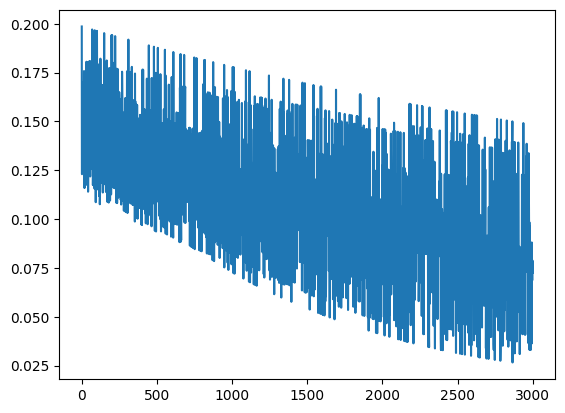

WEIGHT VECTOR [0.08030347 0.13717012 0.07712011 0.07032705 0.17278733 0.03796492
 0.07017041 0.98022903]
MEAN ABSOLUTE ERROR 0.19672983072835268
MEAN SQUARE ERROR 0.04815050301719742
R SQUARED 0.05011861434769593
CORRELATION COEFFICIENT 0.7521973787012767


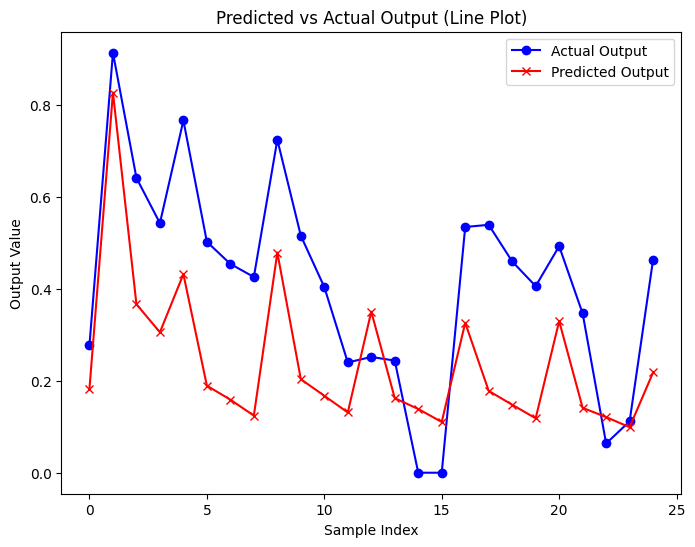

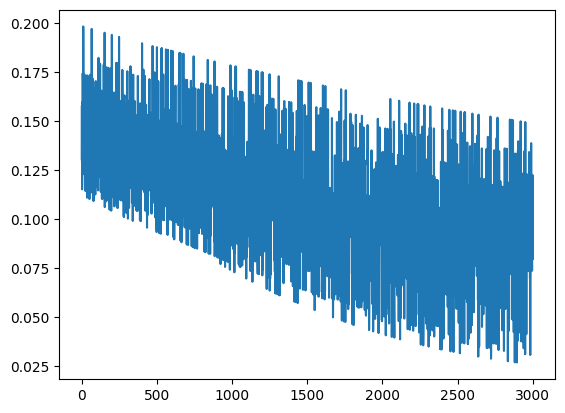

WEIGHT VECTOR [0.0802105  0.13712748 0.07720363 0.07076237 0.17443437 0.03833906
 0.07045531 0.97959311]
MEAN ABSOLUTE ERROR 0.19681672253112248
MEAN SQUARE ERROR 0.04818587981902504
R SQUARED 0.04942072411946785
CORRELATION COEFFICIENT 0.75214591588428


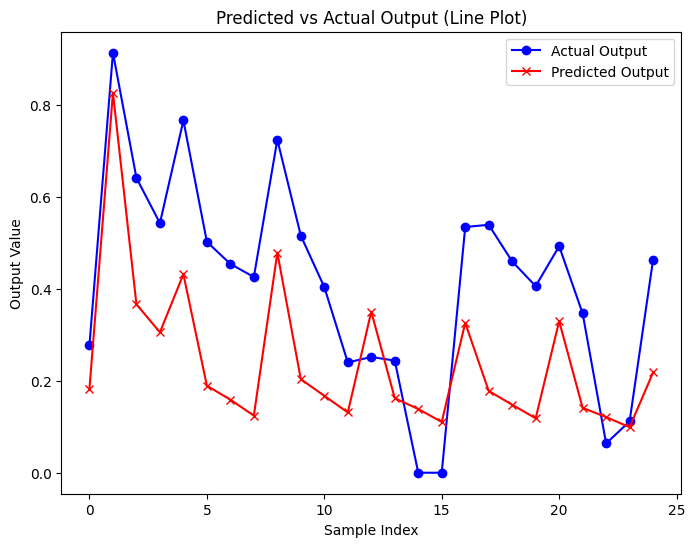

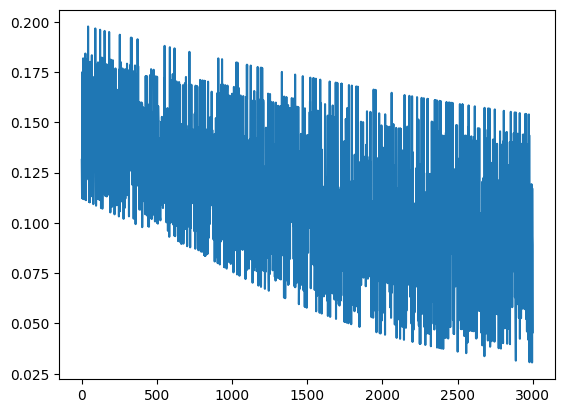

WEIGHT VECTOR [0.08398397 0.14065932 0.08051053 0.07362503 0.17701653 0.04143644
 0.07330409 0.97774933]
MEAN ABSOLUTE ERROR 0.19692366322556015
MEAN SQUARE ERROR 0.04822329255514592
R SQUARED 0.04868267032146578
CORRELATION COEFFICIENT 0.7520709890366681


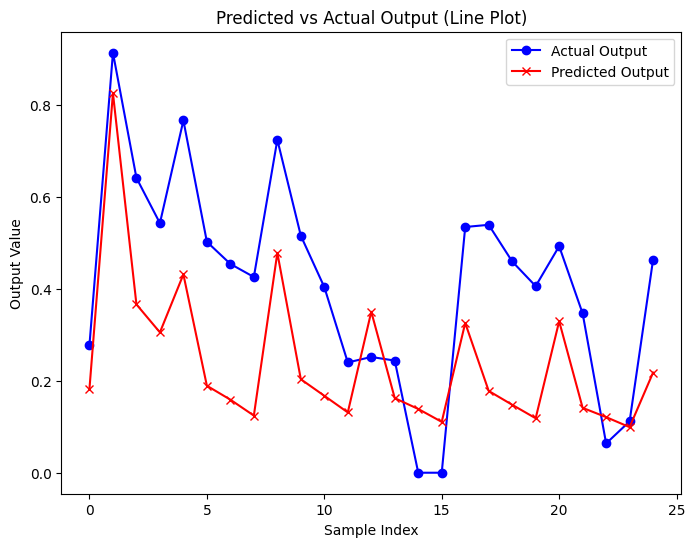

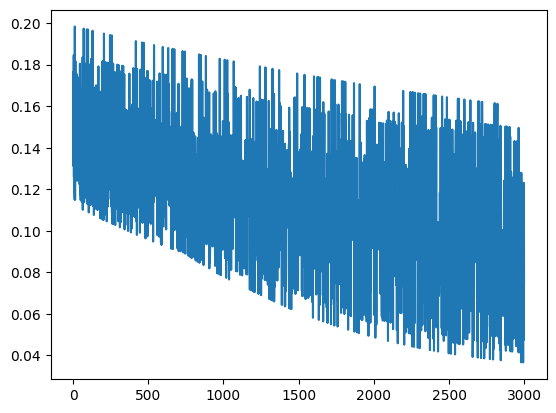

WEIGHT VECTOR [0.08807873 0.14342659 0.08381796 0.07723613 0.17885935 0.04529324
 0.07730434 0.97908313]
MEAN ABSOLUTE ERROR 0.19644586037604894
MEAN SQUARE ERROR 0.04801034999375475
R SQUARED 0.052883460813859084
CORRELATION COEFFICIENT 0.7519999953103972


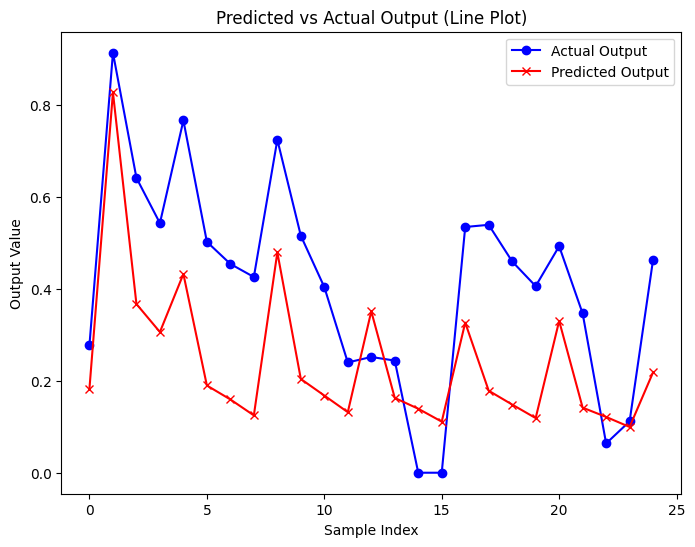

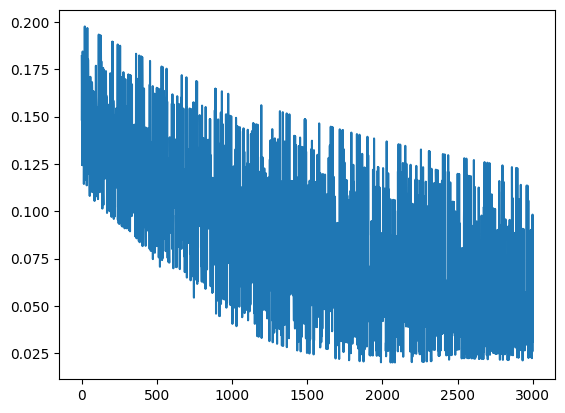

WEIGHT VECTOR [0.14109356 0.22798406 0.12730087 0.11787169 0.29635216 0.06631848
 0.12118846 1.55991607]
MEAN ABSOLUTE ERROR 0.14006665851555217
MEAN SQUARE ERROR 0.03146349140141227
R SQUARED 0.37930898044494876
CORRELATION COEFFICIENT 0.7518863879816244


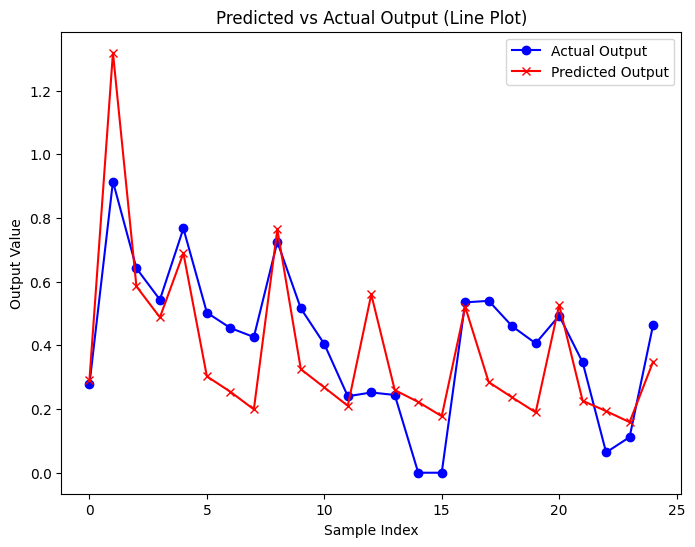

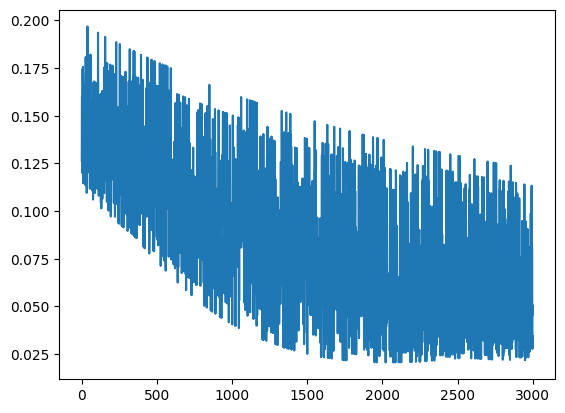

WEIGHT VECTOR [0.14097384 0.23042016 0.12903298 0.11903063 0.29892167 0.0667721
 0.12169208 1.57439577]
MEAN ABSOLUTE ERROR 0.14021732493047998
MEAN SQUARE ERROR 0.03187363364163826
R SQUARED 0.37121796467048707
CORRELATION COEFFICIENT 0.7518895476059195


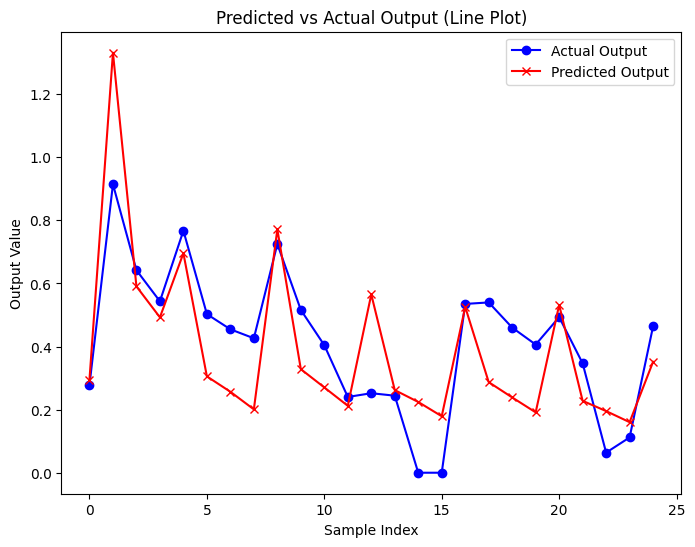

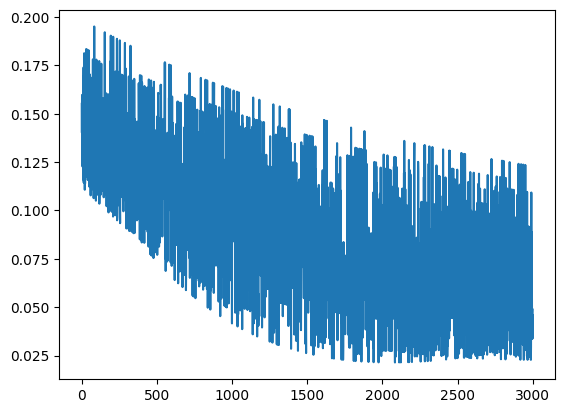

WEIGHT VECTOR [0.14205323 0.22885518 0.12848708 0.11907535 0.29865305 0.06761066
 0.1221729  1.56321883]
MEAN ABSOLUTE ERROR 0.14009662752751528
MEAN SQUARE ERROR 0.03155602389164849
R SQUARED 0.37748356046933496
CORRELATION COEFFICIENT 0.7518544429731617


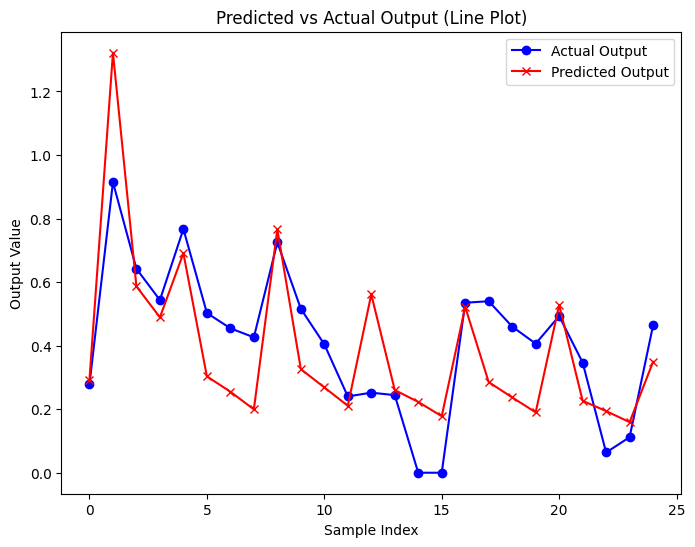

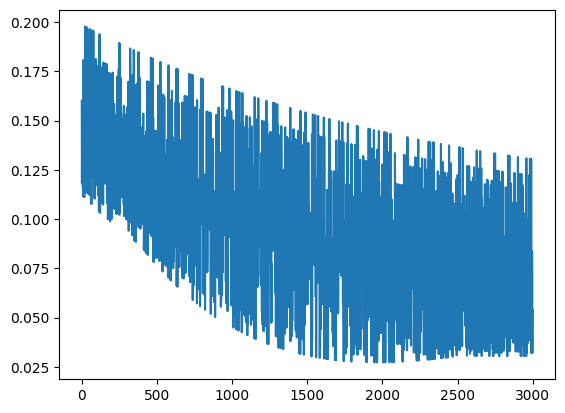

WEIGHT VECTOR [0.15114741 0.2368051  0.13567056 0.12489558 0.30128047 0.07426486
 0.12881469 1.56485435]
MEAN ABSOLUTE ERROR 0.14006613059755751
MEAN SQUARE ERROR 0.031627933100507086
R SQUARED 0.37606498299513147
CORRELATION COEFFICIENT 0.7518184175597198


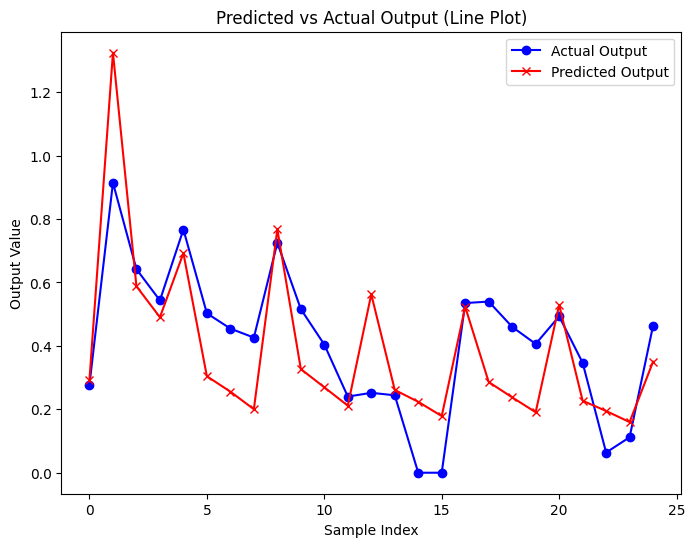

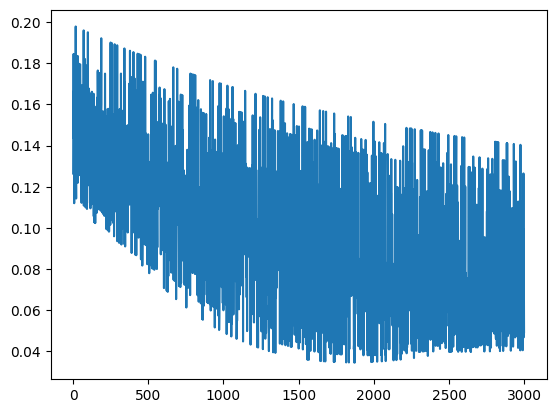

WEIGHT VECTOR [0.15544941 0.24213528 0.14187957 0.13232502 0.30989906 0.08111603
 0.13558927 1.56673094]
MEAN ABSOLUTE ERROR 0.14004961076587516
MEAN SQUARE ERROR 0.03170689006948282
R SQUARED 0.3745073719547901
CORRELATION COEFFICIENT 0.7516439513771


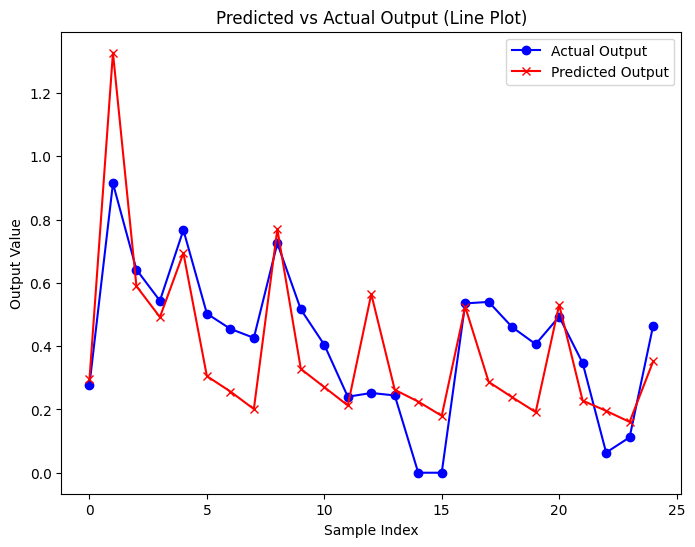

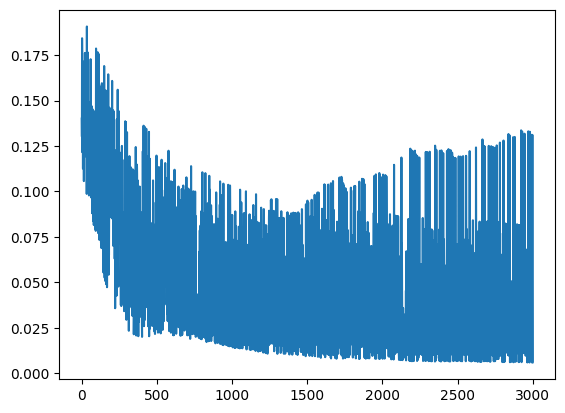

WEIGHT VECTOR [0.43225606 0.51180886 0.27806675 0.27736425 0.76602475 0.20036074
 0.34079442 2.42809362]
MEAN ABSOLUTE ERROR 0.2562868369704245
MEAN SQUARE ERROR 0.1368618288868558
R SQUARED -1.699919949320643
CORRELATION COEFFICIENT 0.7490702290659006


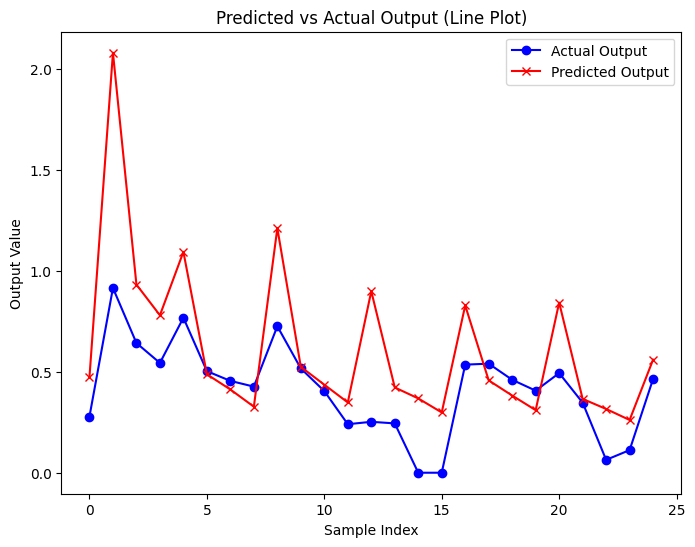

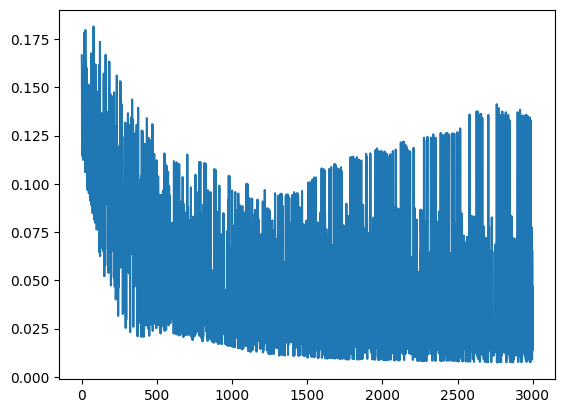

WEIGHT VECTOR [0.44035726 0.516896   0.28229168 0.28213677 0.7734833  0.20511197
 0.34686815 2.44615884]
MEAN ABSOLUTE ERROR 0.2600766479685518
MEAN SQUARE ERROR 0.1407858829368975
R SQUARED -1.777331101123084
CORRELATION COEFFICIENT 0.7490426050797794


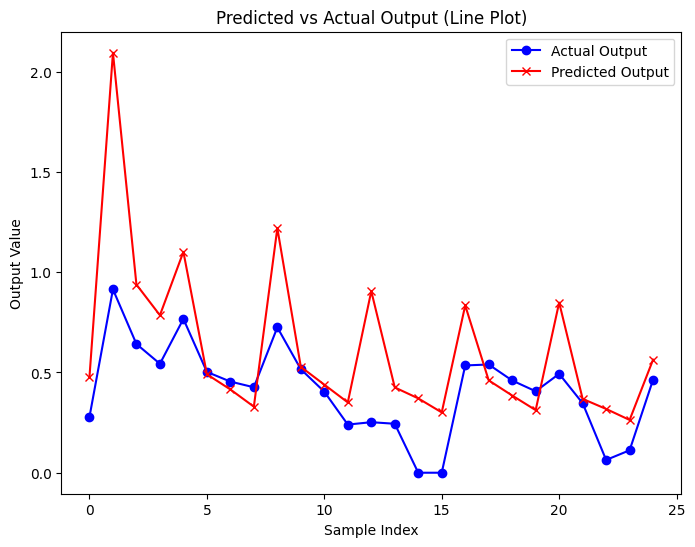

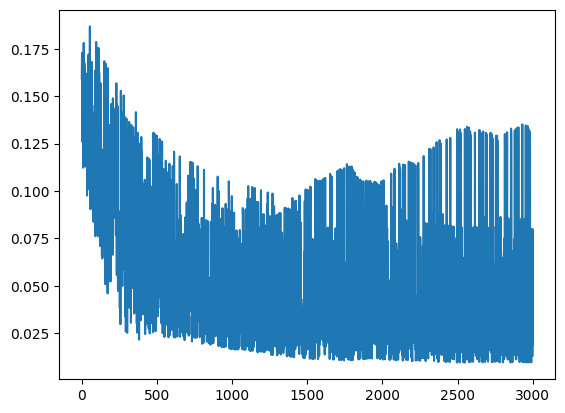

WEIGHT VECTOR [0.4380476  0.52157423 0.28542207 0.28725831 0.77921916 0.20751794
 0.34969966 2.42693437]
MEAN ABSOLUTE ERROR 0.2568454662210554
MEAN SQUARE ERROR 0.13727330333912627
R SQUARED -1.7080372460962057
CORRELATION COEFFICIENT 0.7489042986610419


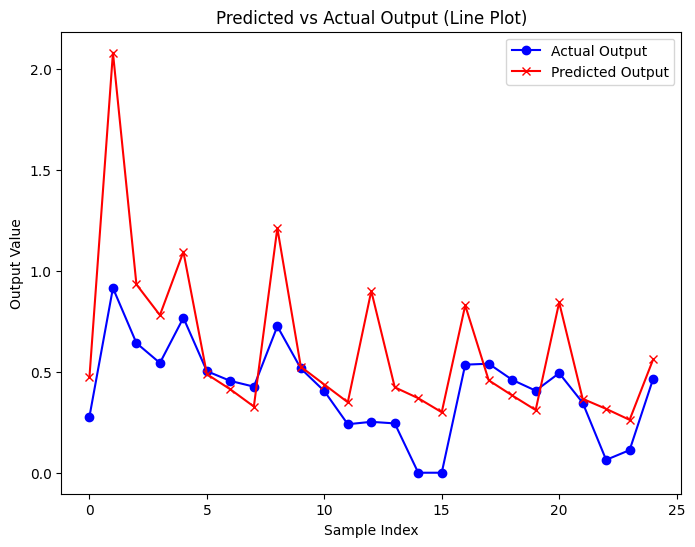

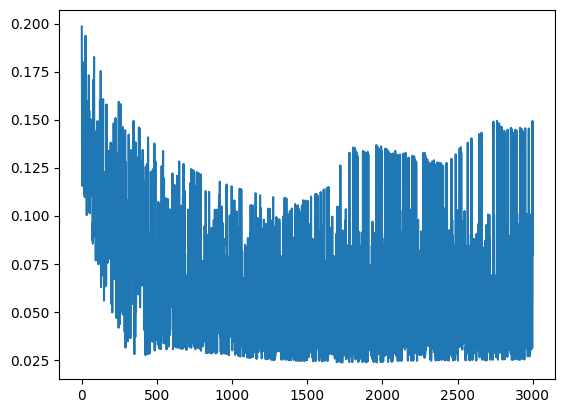

WEIGHT VECTOR [0.47545073 0.54779266 0.31465735 0.31256312 0.80254209 0.23923036
 0.38002704 2.41332391]
MEAN ABSOLUTE ERROR 0.2564111866720596
MEAN SQUARE ERROR 0.1364046143269938
R SQUARED -1.6909003218516006
CORRELATION COEFFICIENT 0.7485995852020917


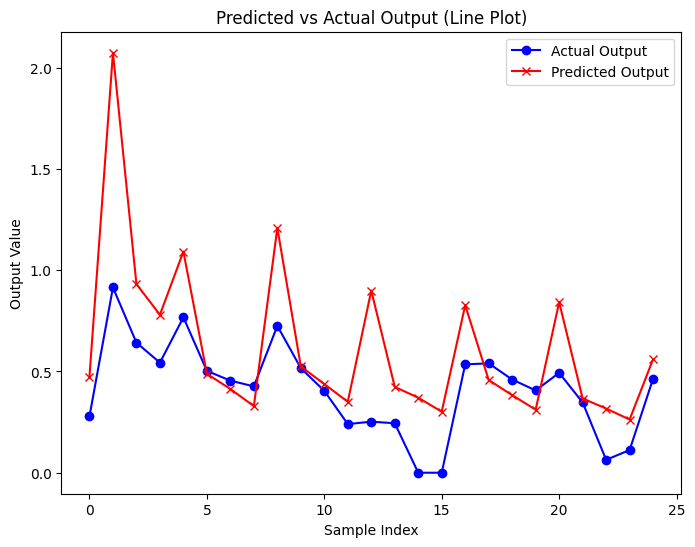

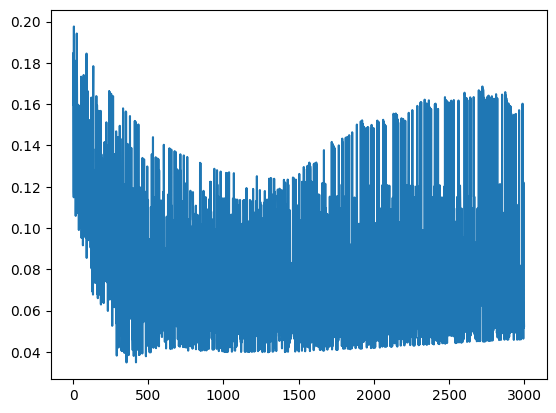

WEIGHT VECTOR [0.5067919  0.57066569 0.34322628 0.34825252 0.8325545  0.27518657
 0.4151726  2.35850431]
MEAN ABSOLUTE ERROR 0.2485510590110363
MEAN SQUARE ERROR 0.12780788765954212
R SQUARED -1.5213097645933185
CORRELATION COEFFICIENT 0.747966403877575


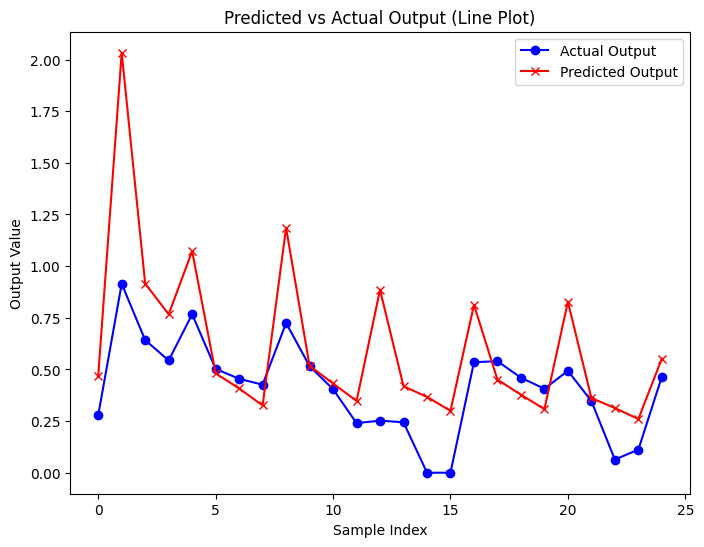

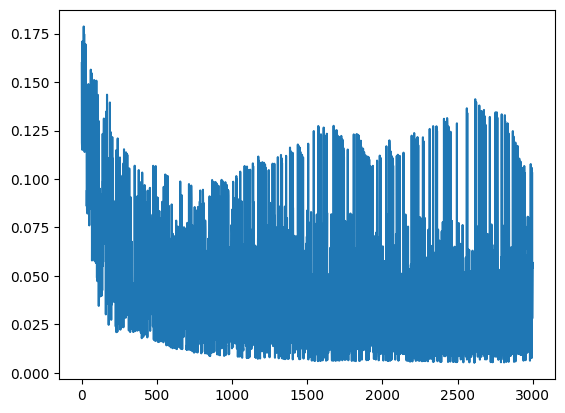

WEIGHT VECTOR [0.75055531 0.72687306 0.38643316 0.40114568 1.17563963 0.34175967
 0.55876613 2.22262337]
MEAN ABSOLUTE ERROR 0.23665254215339324
MEAN SQUARE ERROR 0.11289541409096661
R SQUARED -1.22712631542431
CORRELATION COEFFICIENT 0.7443701898997309


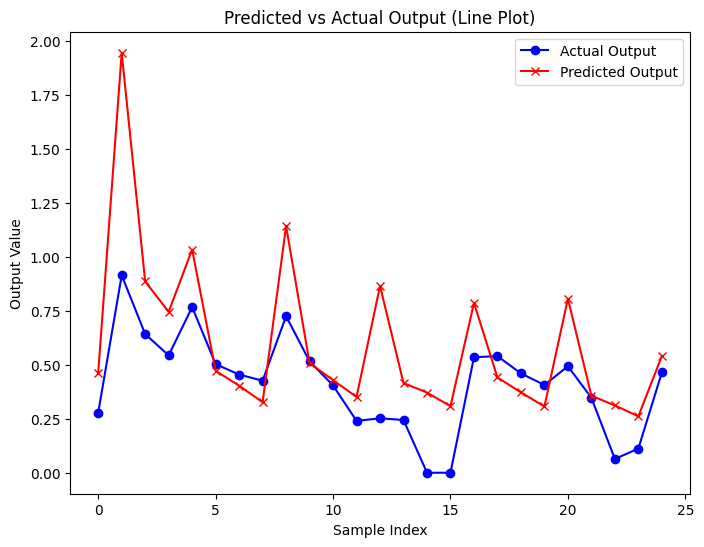

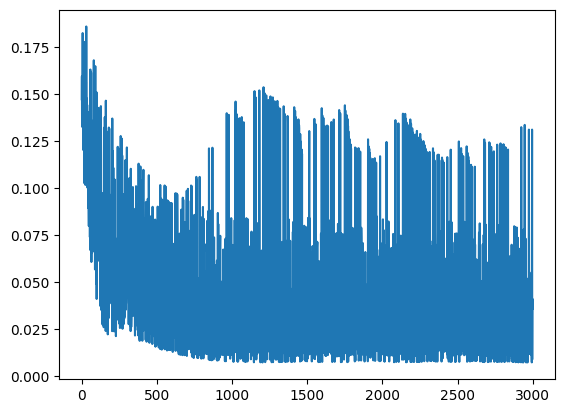

WEIGHT VECTOR [0.74272642 0.72909239 0.39154168 0.40827214 1.15497393 0.34106802
 0.55666611 2.3635346 ]
MEAN ABSOLUTE ERROR 0.2618623340691574
MEAN SQUARE ERROR 0.13890030029801193
R SQUARED -1.7401335696840694
CORRELATION COEFFICIENT 0.7452124693265204


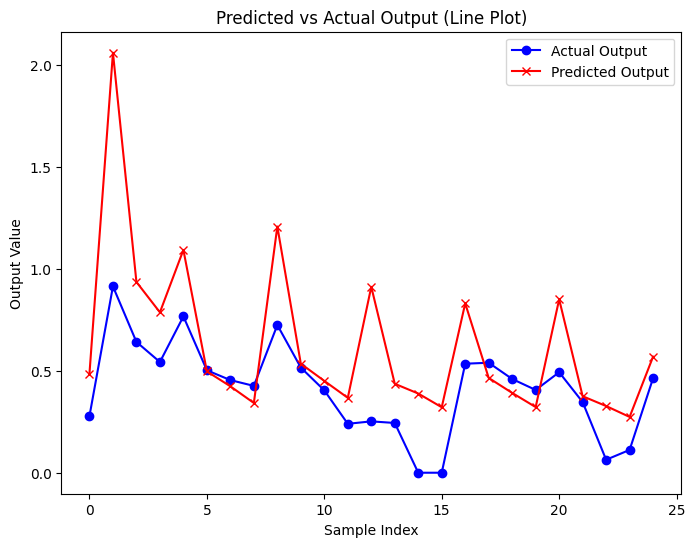

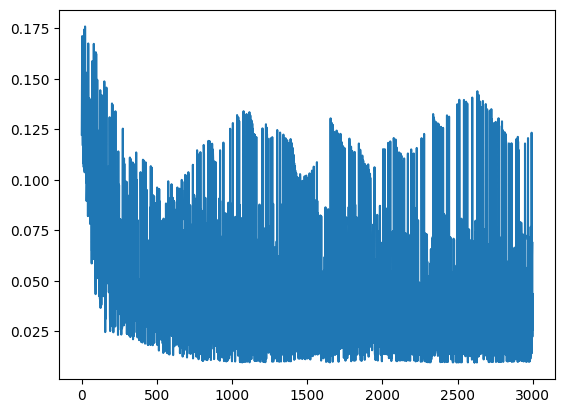

WEIGHT VECTOR [0.75669731 0.74403073 0.4018632  0.4173985  1.17539024 0.35174435
 0.56772225 2.32787509]
MEAN ABSOLUTE ERROR 0.25633059591340285
MEAN SQUARE ERROR 0.13287401809050825
R SQUARED -1.621251046451634
CORRELATION COEFFICIENT 0.7448517730904449


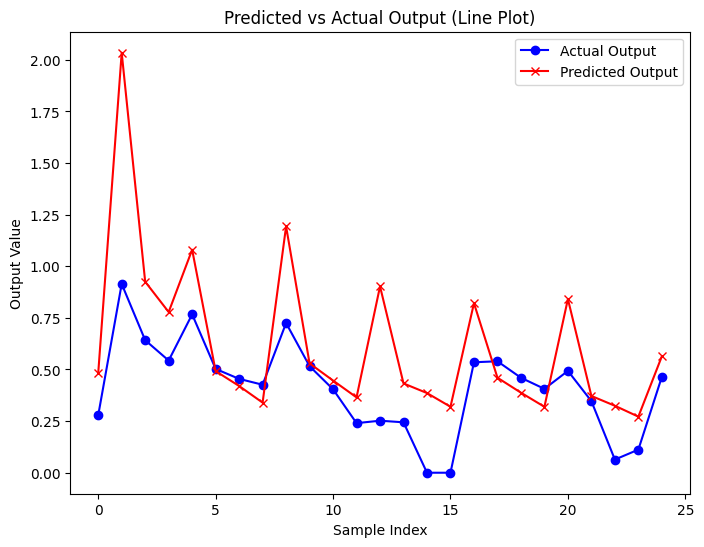

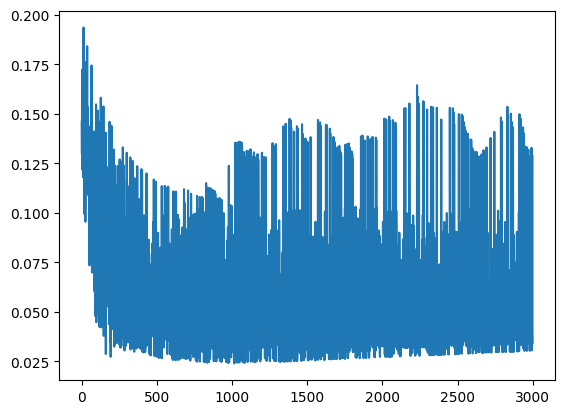

WEIGHT VECTOR [0.80702016 0.78278627 0.44958155 0.47072816 1.2218618  0.40930215
 0.62226961 2.2179609 ]
MEAN ABSOLUTE ERROR 0.23993530249074344
MEAN SQUARE ERROR 0.1155810063047362
R SQUARED -1.2801059084391824
CORRELATION COEFFICIENT 0.7435861236406147


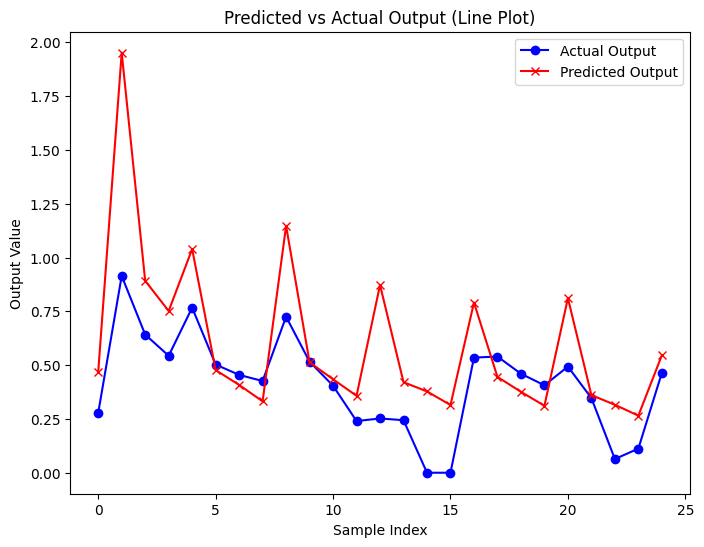

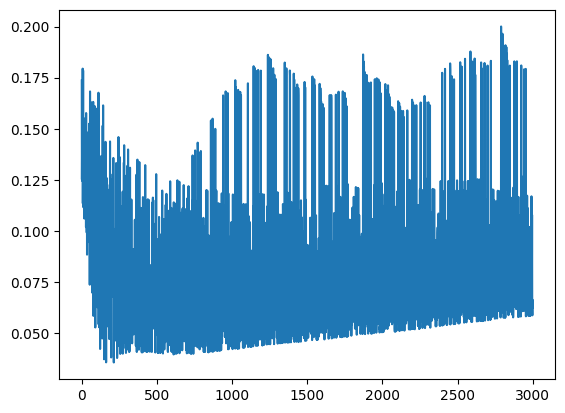

WEIGHT VECTOR [0.87421258 0.84975814 0.52534107 0.5360049  1.25556387 0.4787718
 0.68719874 2.36464832]
MEAN ABSOLUTE ERROR 0.2716490092231528
MEAN SQUARE ERROR 0.14764347335475392
R SQUARED -1.9126131247817546
CORRELATION COEFFICIENT 0.7438943437065783


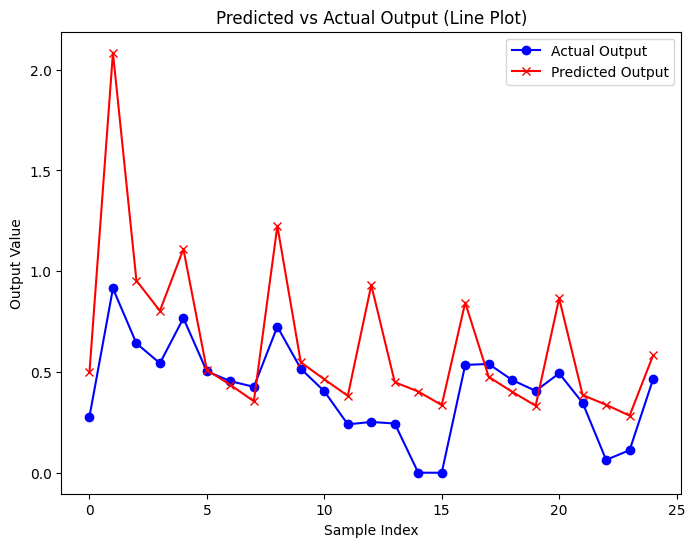

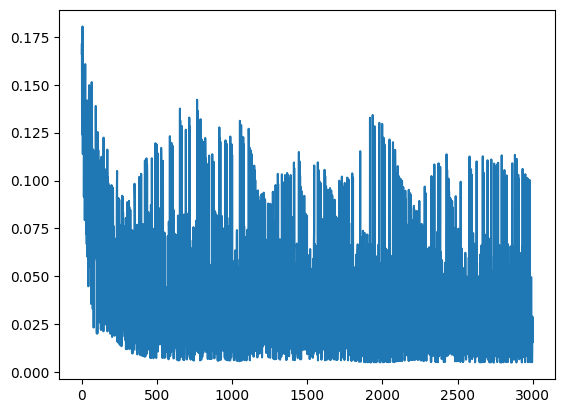

WEIGHT VECTOR [1.32063424 1.14262906 0.60183368 0.62081897 1.80899443 0.59000246
 0.93352851 2.14366275]
MEAN ABSOLUTE ERROR 0.2520043821089436
MEAN SQUARE ERROR 0.12308356344873474
R SQUARED -1.4281114105485084
CORRELATION COEFFICIENT 0.7377613005038838


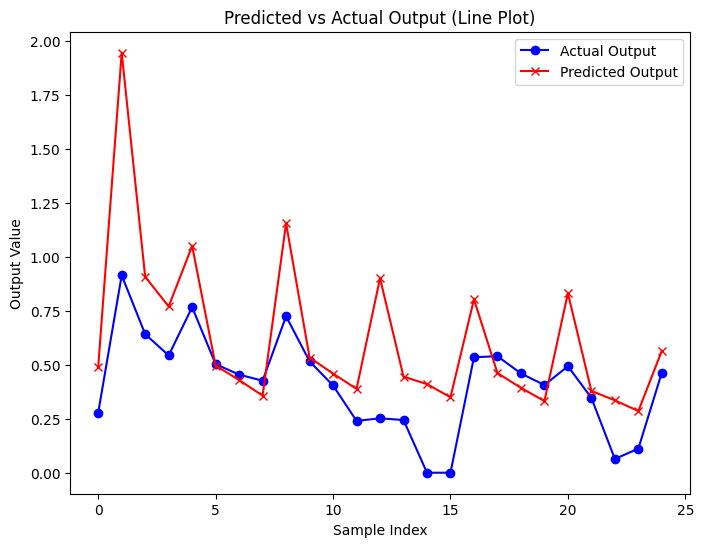

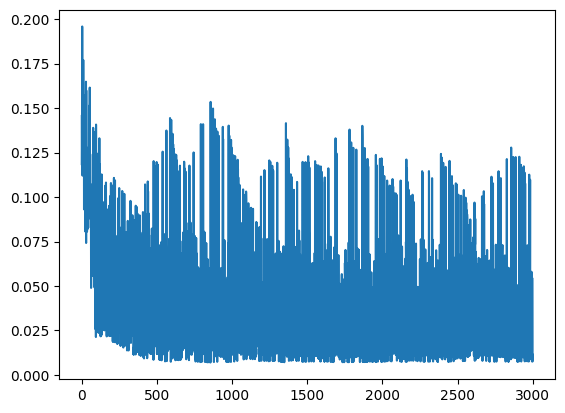

WEIGHT VECTOR [1.30991432 1.13292299 0.60399651 0.62926801 1.80790663 0.59457859
 0.9365416  2.17776049]
MEAN ABSOLUTE ERROR 0.25826114409677703
MEAN SQUARE ERROR 0.12935393454474833
R SQUARED -1.5518091584849794
CORRELATION COEFFICIENT 0.7379088918710474


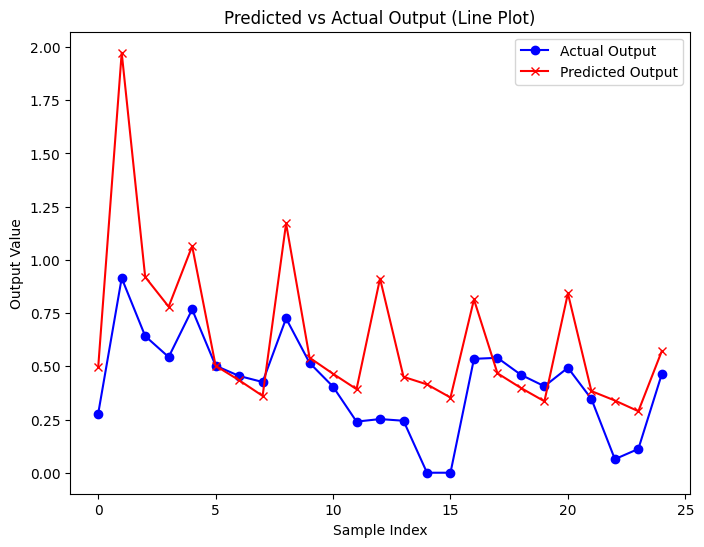

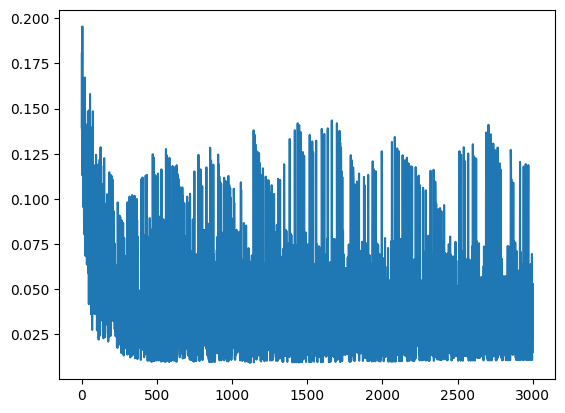

WEIGHT VECTOR [1.32272283 1.14037853 0.61604921 0.64272867 1.80245134 0.60753668
 0.9499154  2.23563944]
MEAN ABSOLUTE ERROR 0.27033409001141107
MEAN SQUARE ERROR 0.14116076344741094
R SQUARED -1.784726496736155
CORRELATION COEFFICIENT 0.7383675054528048


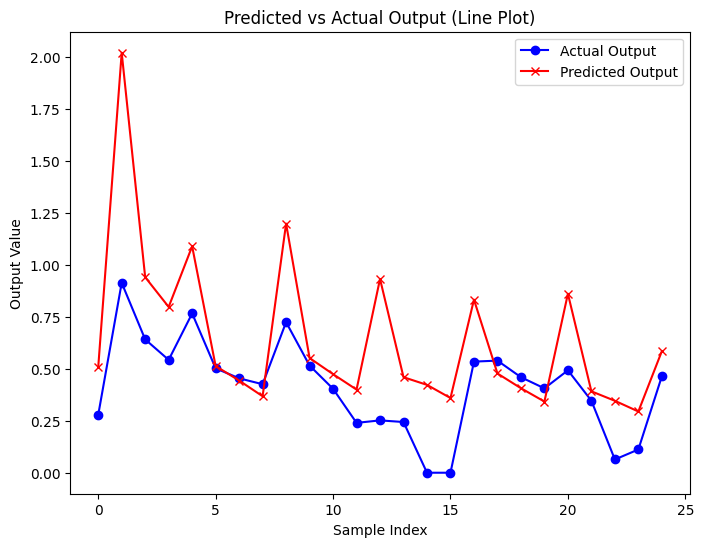

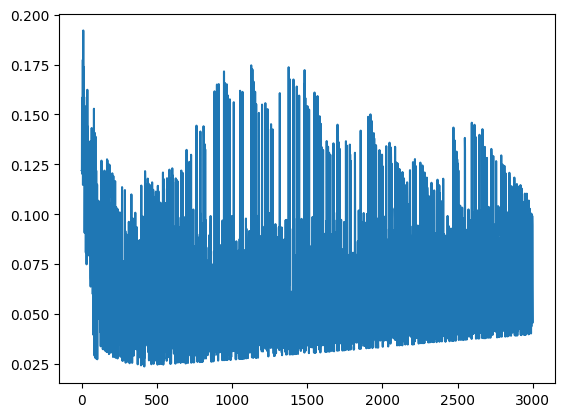

WEIGHT VECTOR [1.45260462 1.22985536 0.71532641 0.74639146 1.88961608 0.72924142
 1.06504983 1.84810104]
MEAN ABSOLUTE ERROR 0.20819627469398946
MEAN SQUARE ERROR 0.08136539132690226
R SQUARED -0.6051228090002698
CORRELATION COEFFICIENT 0.733258771950769


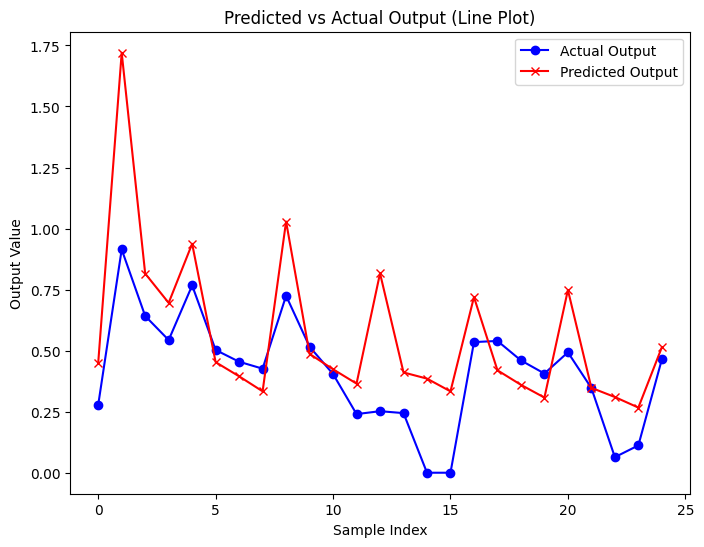

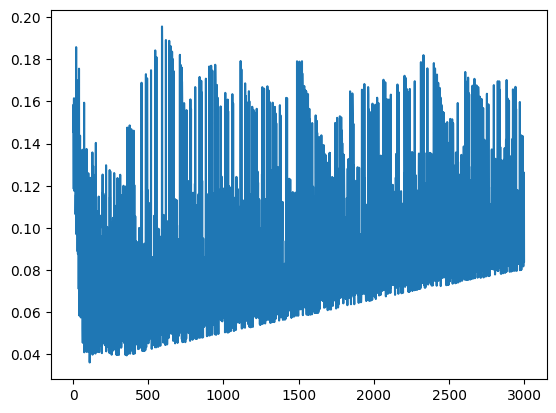

WEIGHT VECTOR [1.56967905 1.35084998 0.85726798 0.86942346 1.96995781 0.86676508
 1.19420003 2.00609145]
MEAN ABSOLUTE ERROR 0.24370777869754665
MEAN SQUARE ERROR 0.11266674576073717
R SQUARED -1.222615297329742
CORRELATION COEFFICIENT 0.7337983064970434


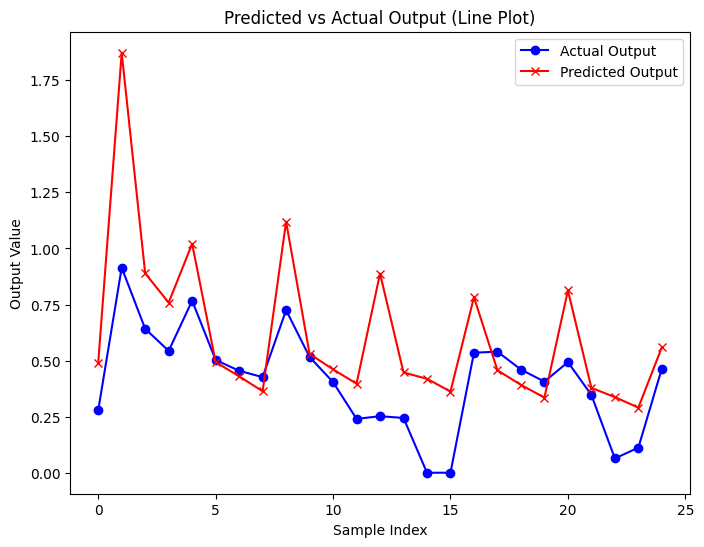

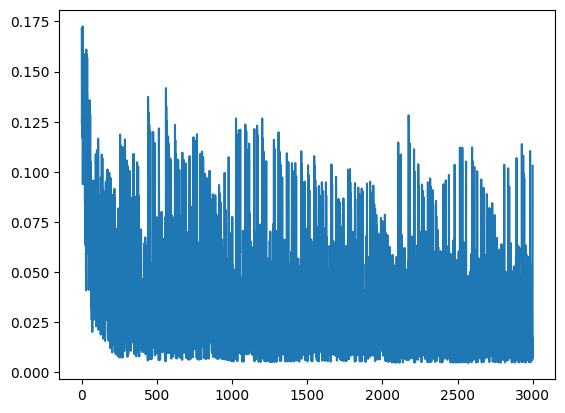

WEIGHT VECTOR [1.86859355 1.49997988 0.79065329 0.80351458 2.29109359 0.82036858
 1.27635631 2.05095996]
MEAN ABSOLUTE ERROR 0.26143502266147567
MEAN SQUARE ERROR 0.1277331867253214
R SQUARED -1.5198361138013055
CORRELATION COEFFICIENT 0.7323276641159421


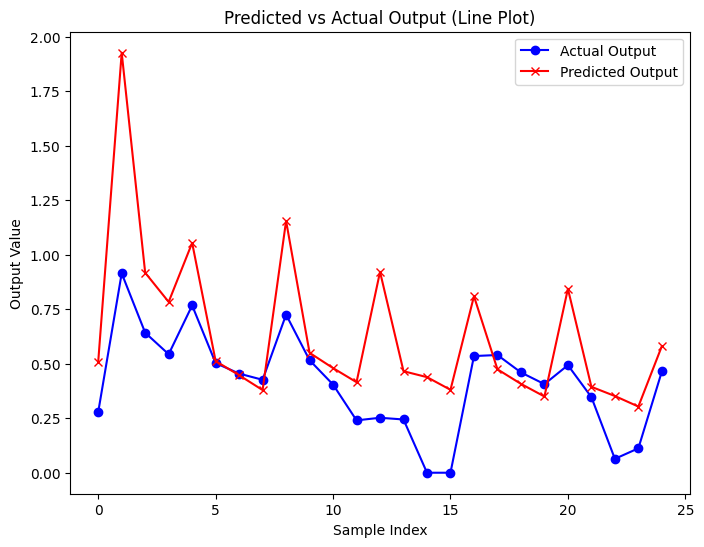

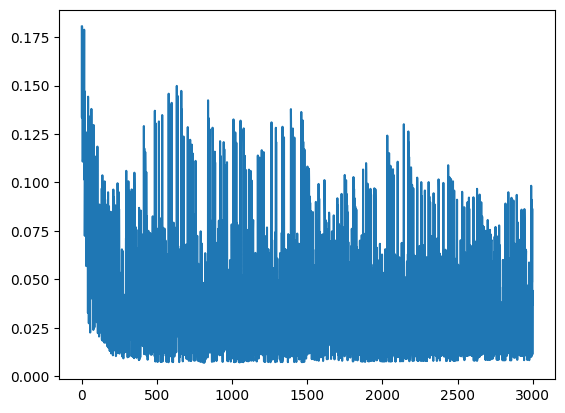

WEIGHT VECTOR [1.91692199 1.52035654 0.80952644 0.8086885  2.28661161 0.84412123
 1.29336421 1.90277418]
MEAN ABSOLUTE ERROR 0.23385194190484437
MEAN SQUARE ERROR 0.10254017270796313
R SQUARED -1.0228449389631273
CORRELATION COEFFICIENT 0.7307615222771513


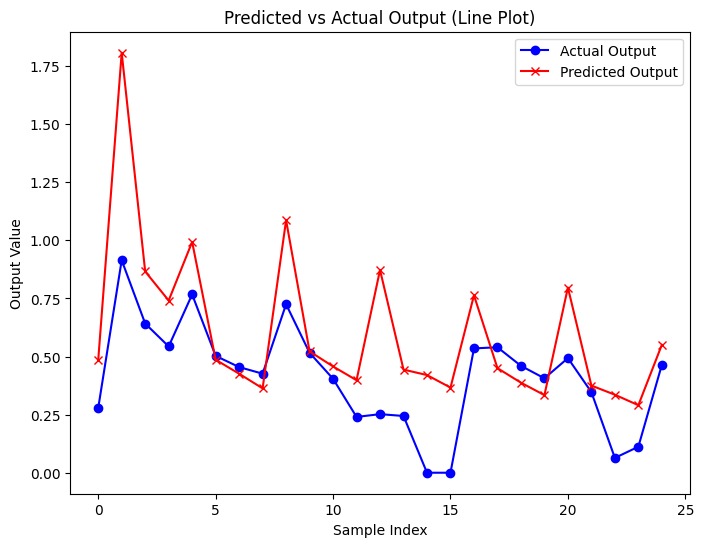

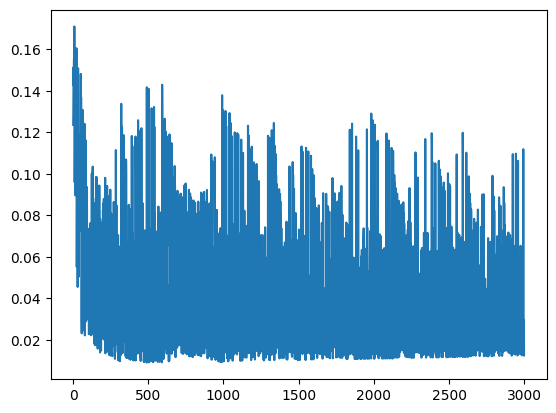

WEIGHT VECTOR [1.88239729 1.57443598 0.84805626 0.84384727 2.34403754 0.85220896
 1.29875296 2.04867866]
MEAN ABSOLUTE ERROR 0.26550022989668415
MEAN SQUARE ERROR 0.13099871488086054
R SQUARED -1.584256300817052
CORRELATION COEFFICIENT 0.7317980913396164


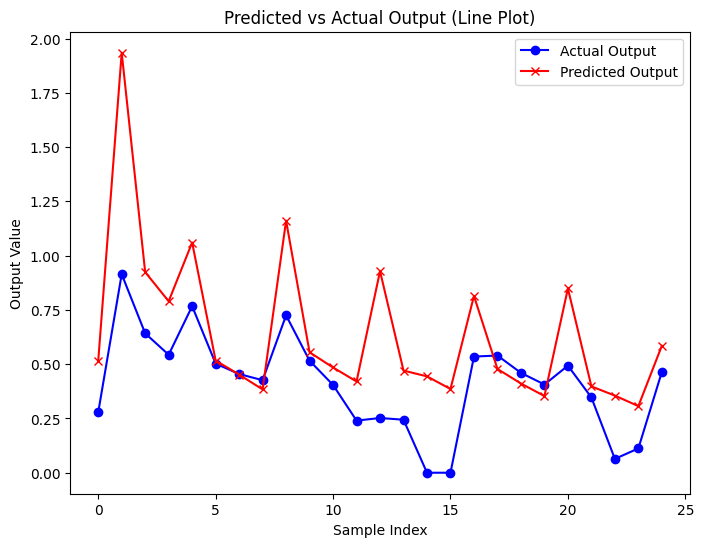

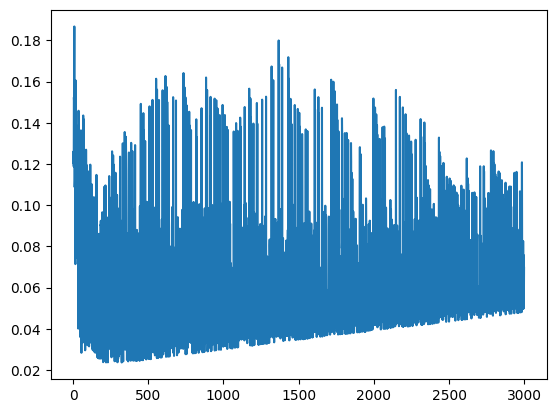

WEIGHT VECTOR [2.00125184 1.64623703 0.97213376 0.98386755 2.38575279 1.00630245
 1.43765496 1.86338049]
MEAN ABSOLUTE ERROR 0.23718090742383116
MEAN SQUARE ERROR 0.10426745445098907
R SQUARED -1.056919614670906
CORRELATION COEFFICIENT 0.7280958214982456


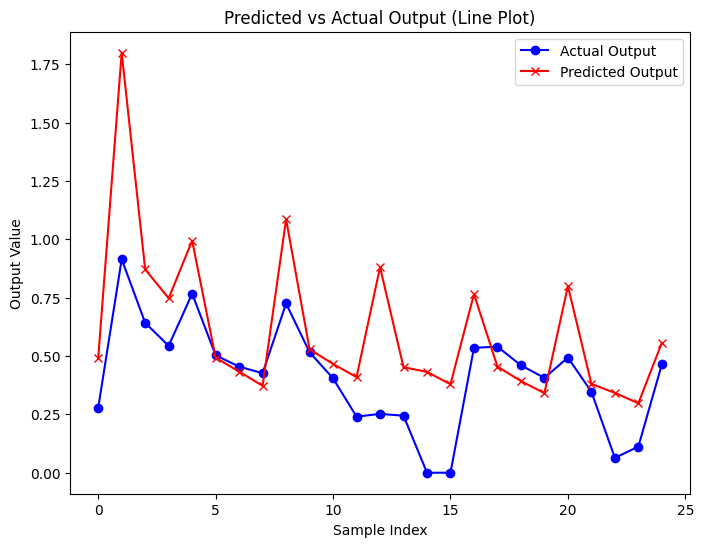

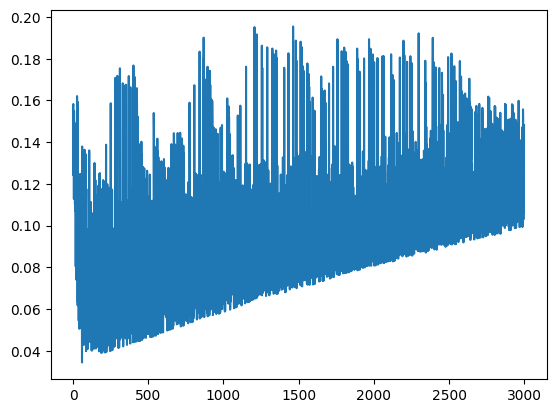

WEIGHT VECTOR [2.20567004 1.84067571 1.1865372  1.1598018  2.48154716 1.21720668
 1.61728517 1.60880293]
MEAN ABSOLUTE ERROR 0.2047442838906762
MEAN SQUARE ERROR 0.07610888661620864
R SQUARED -0.5014259488345887
CORRELATION COEFFICIENT 0.722321388492974


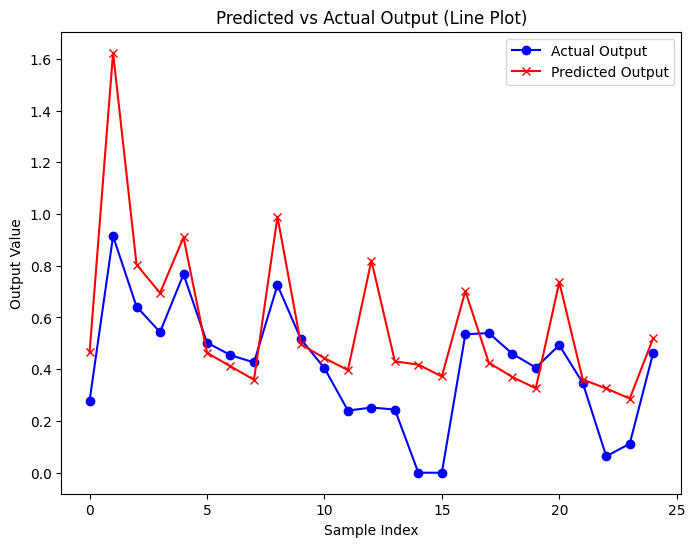

In [ ]:
for i in range(alpha.shape[0]-1):
  for j in range(lamb.shape[0]-1):
    a = alpha[i]
    l = lamb[j]
    iters = 3000
    batch_size = 14
    mb_w_l1,J_mb_l1 = Mini_batch_gradient_descent_l1(X_train,y_train,w,a,iters, batch_size,l)
    plt.plot(range(iters),J_mb_l1)
    plt.show()
    cal(X_test,y_test,mb_w_l1)